# Importing libraries

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
sns.set()
get_ipython().magic('matplotlib inline')
import sklearn # for scientific calculations
from sklearn import preprocessing
from matplotlib import rcParams
from seaborn import distplot
import warnings
warnings.filterwarnings("ignore")

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
data = pd.read_csv("cardiovascular.csv", sep=";")

# Data preparation

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data.shape

(70000, 13)

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# Rename columns to make features more clearly understood
data.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'target'}, inplace=True)

In [8]:
data.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
data = data.drop('id', axis=1)

In [10]:
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# 24 Duplicated entries
print(f'{data.duplicated().sum()} duplicates recorded.')

24 duplicates recorded.


In [12]:
data[data.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.count()

age            69976
gender         69976
height         69976
weight         69976
systolic       69976
diastolic      69976
cholesterol    69976
glucose        69976
smoke          69976
alcohol        69976
active         69976
target         69976
dtype: int64

In [15]:
print(f'{data.dtypes.value_counts()}')

int64      11
float64     1
dtype: int64


In [16]:
data.shape

(69976, 12)

In [17]:
print('Let us now get a quick summary of features available.')
data.describe().T.round(2)

Let us now get a quick summary of features available.


,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.95,2467.37,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.35,0.48,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.36,8.21,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.21,14.40,10.0,65.0,72.0,82.0,200.0
systolic,69976.0,128.82,154.04,-150.0,120.0,120.0,140.0,16020.0
diastolic,69976.0,96.64,188.50,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.37,0.68,1.0,1.0,1.0,2.0,3.0
glucose,69976.0,1.23,0.57,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.09,0.28,0.0,0.0,0.0,0.0,1.0
alcohol,69976.0,0.05,0.23,0.0,0.0,0.0,0.0,1.0


# Data Visualization

As ages are in number of days let us caluclate the age and categorize.

In [18]:
# Convert the ages from number of days to categorical values
def calculate_age(days):
  days_year = 365.2425
  age = int(days // days_year)
  return age

In [19]:
def categorize_age(age):
  if 0 < age <= 2:
    return "Infants"
  elif 2 < age <= 5:
    return "Pre School Child"
  elif 5 < age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Adolescent"
  elif 19 < age <= 24:
    return "Young Adult"
  elif 24 < age <= 44:
    return "Adult"
  elif 44 < age <= 65:
    return "Middle Aged"
  elif 65 < age:
    return "Aged"

In [20]:
def categorize_age_tees(age):
  if 0 < age <= 10:
    return "10s"
  elif 10 < age <= 30:
    return "20s"
  elif 20 < age <= 30:
    return "30s"
  elif 30 < age <= 40:
    return "40s"
  elif 40 < age <= 50:
    return "50s"
  elif 50 < age <= 60:
    return "60s"
  elif 60 < age <= 70:
    return "70+"

In [21]:
# age transformations
data['age'] = data['age'].apply(lambda x: calculate_age(x))
data['age_cat'] = data['age'].apply(lambda x: categorize_age(x))
data['age_tees'] = data['age'].apply(lambda x: categorize_age_tees(x))
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Middle Aged,50s
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Middle Aged,60s
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Middle Aged,50s
4,47,1,156,56.0,100,60,1,1,0,0,0,0,Middle Aged,50s


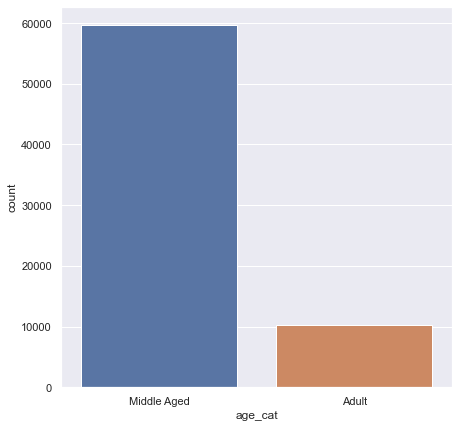

In [22]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', data = data) 

From this graph information , the dataset contains majorly of Middle Aged people data and minor of Adult data.

Let us look by how many of the people got affected by CVD & not by their age group.

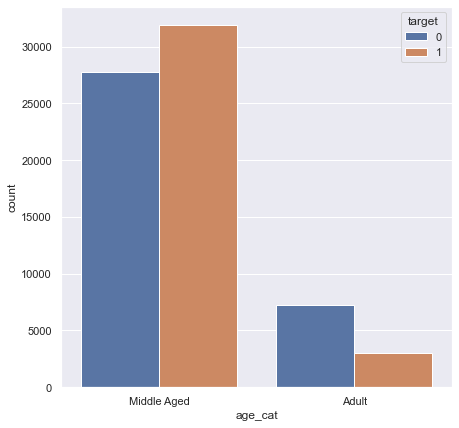

In [23]:
# Visulization of age groups with cvd info
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', hue = 'target', data = data) 

The graph says mostly middle aged people are affected by CVD while comparing to Adult.

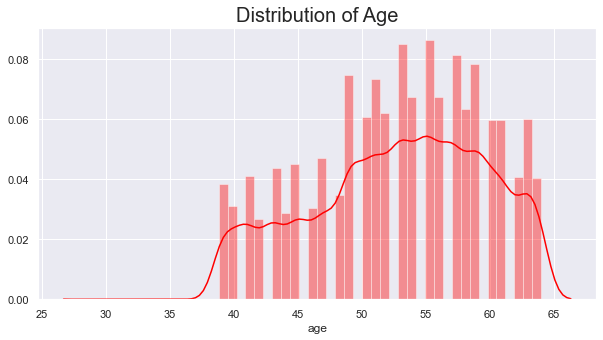

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(data['age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

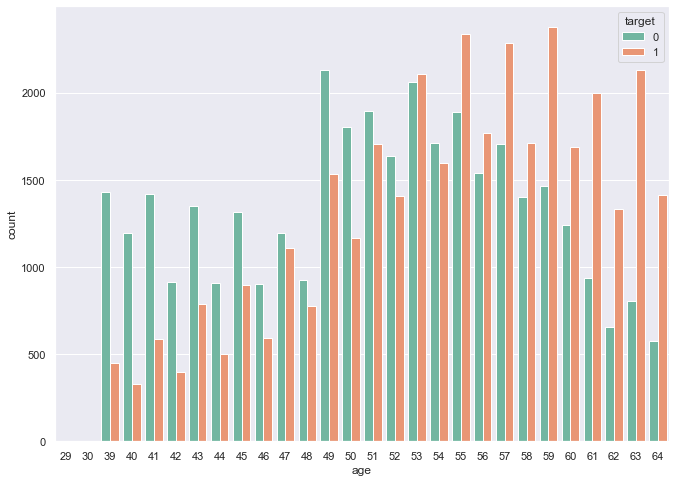

In [25]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='target', data = data, palette="Set2");

From this visual we can assume that people who are 55 greater in age are more exposed to CVD. But both the categorization are seem to be over and less variated which is not good for consider to be modelled because of improper distribution . So we can categorize by 10's of their ages.

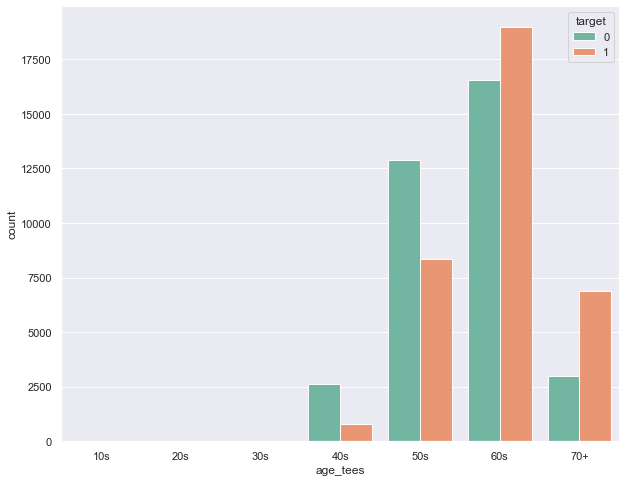

In [26]:
rcParams['figure.figsize'] = 10, 8
sns.countplot(x='age_tees', hue='target', data = data, palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+']);

this graph infer that 60s and 70+ ages are more prone to CVD compare to 40s and 50s. Also there are no CVD patient in 10s, 20s, 30s category. Also , compare to other age visuals it gives more clarity so that we can consider it for FE for modelling.

Coming into gender ratio , in our dataset we have classified gender field by binaries 0 and 1 . We are not sure what 0 and 1 stands for whether its Male or Female .

Basically , Men and Female has certain properties. From our given dataset we can check for following properties and conclude the categories.

Height - Men are on average have more height than Women

Alcohol - Men are more into this habit compare to Women

Gender ratio - Men will be high compare to Women

In [27]:
# Height comparison 
data.groupby('gender')['height'].mean()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64

On Average , Label 2 is heigher than Label 1.

In [28]:
# Alcohol consumption 
data.groupby('gender')['alcohol'].sum()

gender
1    1161
2    2603
Name: alcohol, dtype: int64

Label 2 has more count of Alcohol consumption compare to Label 1 which adds more strength of Label 2 being male.

In [29]:
# Gender Ratio
data['gender'].value_counts()

1    45509
2    24467
Name: gender, dtype: int64

This count values says that Label 1 ( Female ) are more compare to Label 2 ( Male )

In [30]:
# Calcualte the CVD distribution based on Gender
data['target'].value_counts(normalize=True)

0    0.500229
1    0.499771
Name: target, dtype: float64

Almost two gender are equally distributed which is balanced based on ratio.

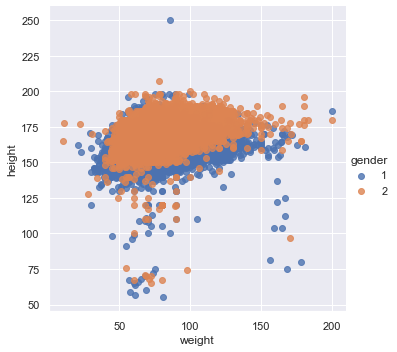

In [31]:
sns.lmplot(x="weight",y="height",hue="gender", data=data, fit_reg=False)
plt.show()

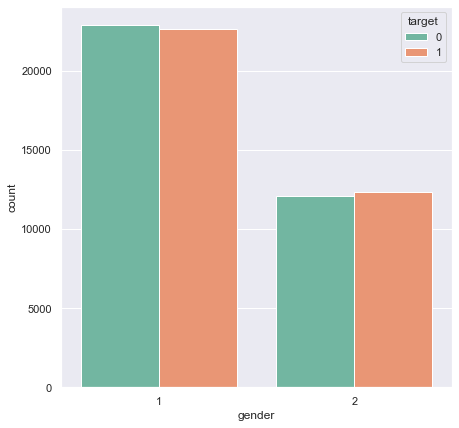

In [32]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='gender', hue='target', data = data, palette="Set2");

Visualizations shows that the disease label is equally distributed but the gender population is not balanced . Label 1 ( Female ) is twice the count of Label 2 ( Male ) .

we analyse the height & weight distribution based on gender.

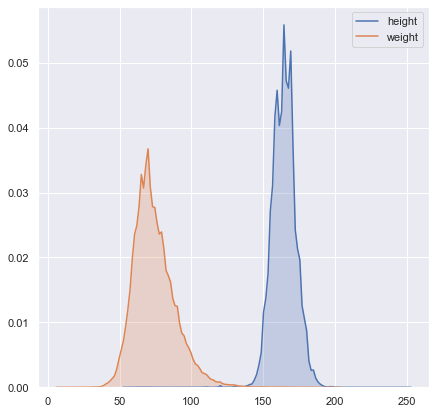

In [33]:
for col in ["height", "weight"]:
    sns.kdeplot(data[col], shade=True)

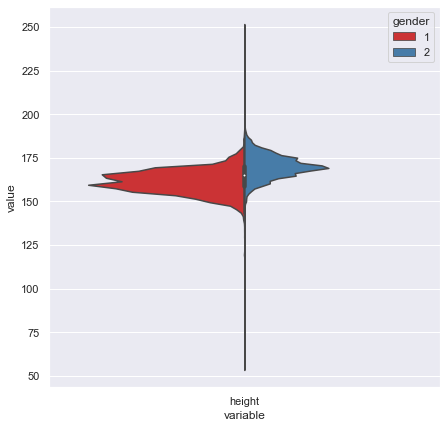

In [34]:
# Height Distribution
data_melt = pd.melt(frame=data, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=data_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

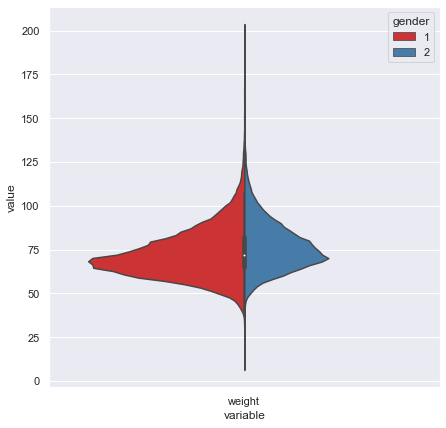

In [35]:
# Weight Distribution
data_melt = pd.melt(frame=data, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=data_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

From the violin plot , the height of label 1 and 2 are slightly variated where label 1 average is around 161 cm and label 2 is around 169 . But in weights both genders are equally distributed only the population matters.So the weight does not add much value for modelling.

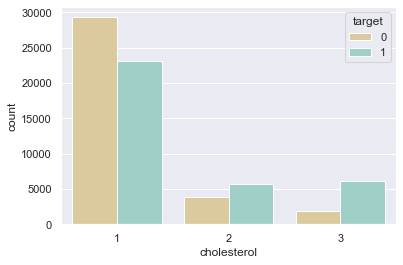

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='target', data=data,palette="BrBG")
plt.show()
# There appears to be a correlation between higher cholesterol levels and cardiovascular disease
# chloesterol levels: 1 = normal, 2 = above normal, 3 = well above normal

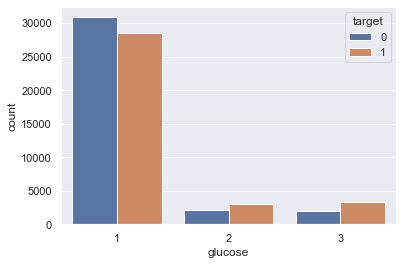

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='glucose', hue='target', data=data)
plt.show()
# There appears to be another correlation between higher glucose levels and cardiovascular disease
# glucose levels: 1 = normal, 2 = above normal, 3 = well above normal

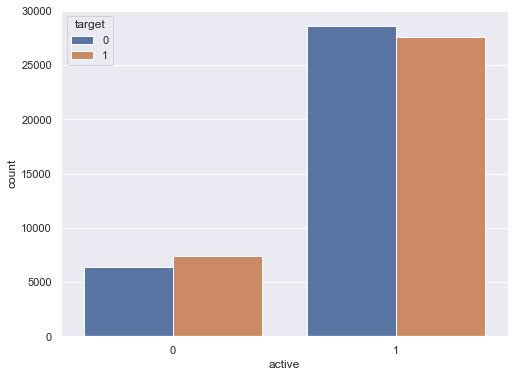

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='active', hue='target', data=data)
plt.show()

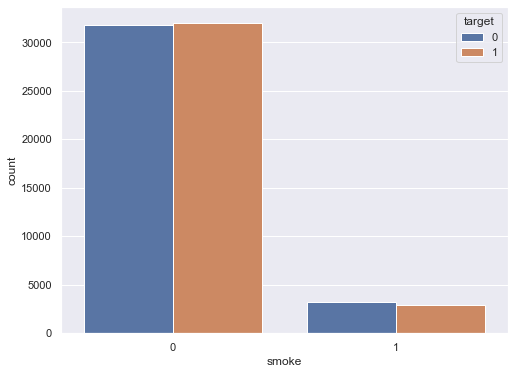

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoke', hue='target', data=data)
plt.show()

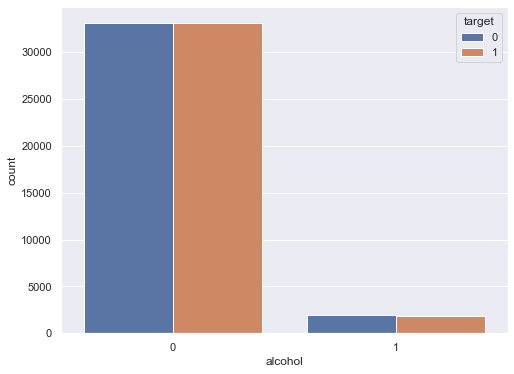

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='alcohol', hue='target', data=data)
plt.show()

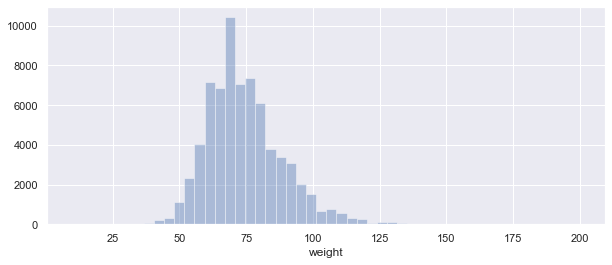

In [41]:
plt.figure(figsize=(10,4))
sns.distplot(data['weight'], kde=False)
plt.show()

In [42]:
data['weight'].sort_values().head()

57858    10.0
33817    11.0
60188    21.0
29488    22.0
26806    23.0
Name: weight, dtype: float64

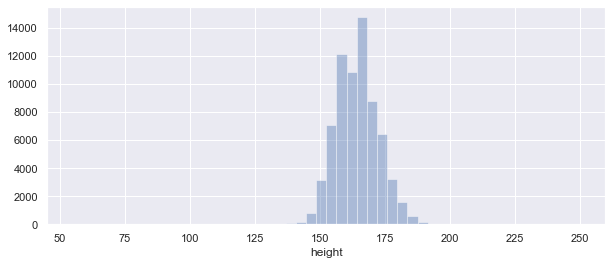

In [43]:
plt.figure(figsize=(10,4))
sns.distplot(data['height'], kde=False)
plt.show()

In [44]:
data['height'].max()
#This maximum height of 250 cm/8.2 ft seems unlikely

250

In [45]:
data['height'].sort_values().head()
#The minimum height of 55 cm/1.8 ft also seems unlikely and unrealistic.
#This dataset may not be legitimate; however, we will continue on with the data analysis and model selection.

22723    55
66643    57
64115    59
29157    60
27603    64
Name: height, dtype: int64

Now let us calculate the BMI of the patients , the BMI says whether the person is in Normal health or not . To calculate it we have a formula

BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared

Normal BMI values are said to be from 18.5 to 25.

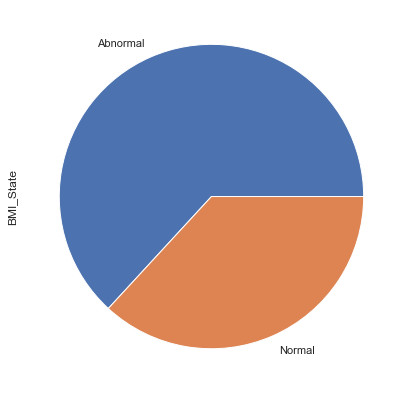

In [46]:
# calculate the BMI score 
data['BMI'] = data['weight']/((data['height']/100)**2)
data['pulse pressure'] = data['systolic'] - data['diastolic']


# categorize normal & abnormal
def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

data["BMI_State"] = data["BMI"].apply(lambda x: bmi_categorize(x))
data["BMI_State"].value_counts().plot(kind='pie')

The majority of our patients are abnormal .

In [47]:
data.head()
# Quick look at the dataframe to make sure these new features have been added

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Middle Aged,50s,21.967120,30,Normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Middle Aged,60s,34.927679,50,Abnormal
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,60,Normal
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Middle Aged,50s,28.710479,50,Abnormal
4,47,1,156,56.0,100,60,1,1,0,0,0,0,Middle Aged,50s,23.011177,40,Normal


In [48]:
data[data['BMI'] > 100].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
6153,57,1,122,161.0,120,80,1,1,0,0,1,1,Middle Aged,60s,108.169847,40,Abnormal
7598,40,2,70,72.0,120,8,1,1,0,0,1,0,Adult,40s,146.938776,112,Abnormal
8171,48,2,97,170.0,160,100,1,1,1,0,1,1,Middle Aged,50s,180.678074,60,Abnormal
12770,53,1,75,168.0,120,80,1,1,1,0,1,1,Middle Aged,60s,298.666667,40,Abnormal
13265,61,2,71,68.0,120,80,3,1,0,0,1,0,Middle Aged,70+,134.893870,40,Abnormal
14323,60,1,67,57.0,120,90,1,1,0,0,1,1,Middle Aged,60s,126.977055,30,Abnormal
15167,43,1,70,68.0,120,80,1,1,0,0,0,0,Adult,50s,138.775510,40,Abnormal
15366,47,1,125,167.0,180,90,1,2,0,0,1,1,Middle Aged,50s,106.880000,90,Abnormal
16699,53,2,74,98.0,140,90,1,1,0,0,1,1,Middle Aged,60s,178.962747,50,Abnormal
20028,54,1,112,167.0,180,120,1,1,0,1,1,0,Middle Aged,60s,133.131378,60,Abnormal


Quick observation to see if extremely high BMI values correlate to cardiovascular disease

In [49]:
data[(data['pulse pressure'] >= 60 ) & (data['cholesterol'] == 3)].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,60,Normal
24,45,1,170,68.0,150,90,3,1,0,0,1,1,Middle Aged,50s,23.529412,60,Normal
44,54,1,154,50.0,170,80,3,1,0,0,1,1,Middle Aged,60s,21.082813,90,Normal
61,57,2,165,75.0,180,90,3,1,0,0,1,1,Middle Aged,60s,27.548209,90,Abnormal
194,60,1,162,62.0,140,80,3,1,0,0,1,1,Middle Aged,60s,23.624447,60,Normal
221,48,1,157,70.0,160,100,3,1,0,0,0,1,Middle Aged,50s,28.398718,60,Abnormal
230,64,2,175,75.0,180,100,3,1,1,1,1,1,Middle Aged,70+,24.489796,80,Normal
275,53,1,157,80.0,150,90,3,1,0,0,1,1,Middle Aged,60s,32.455678,60,Abnormal
280,55,1,152,72.0,160,90,3,1,0,0,1,1,Middle Aged,60s,31.163435,70,Abnormal
299,63,2,173,85.0,140,80,3,1,0,0,1,1,Middle Aged,70+,28.400548,60,Abnormal


we need to check how many of them cvd if they have abnormal bmi score.

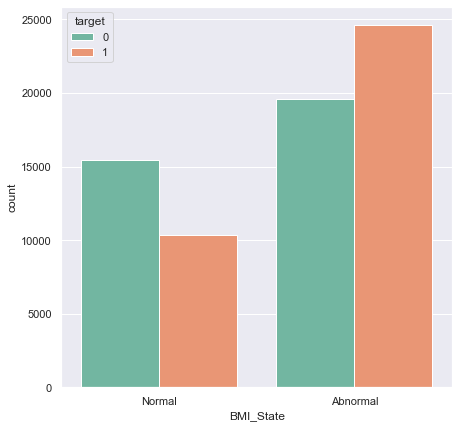

In [50]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='BMI_State', hue='target', data = data, palette="Set2");

This one gave a valuable insight stating that people who follows normal BMI score are less prone to CVD and people with abnormal BMI are having increasing CVD.

But we need to check on what conditions they are abnormal such as alcohol habit, physical activities, smoking etc. How these habits are affecting the BMI state of a patient.

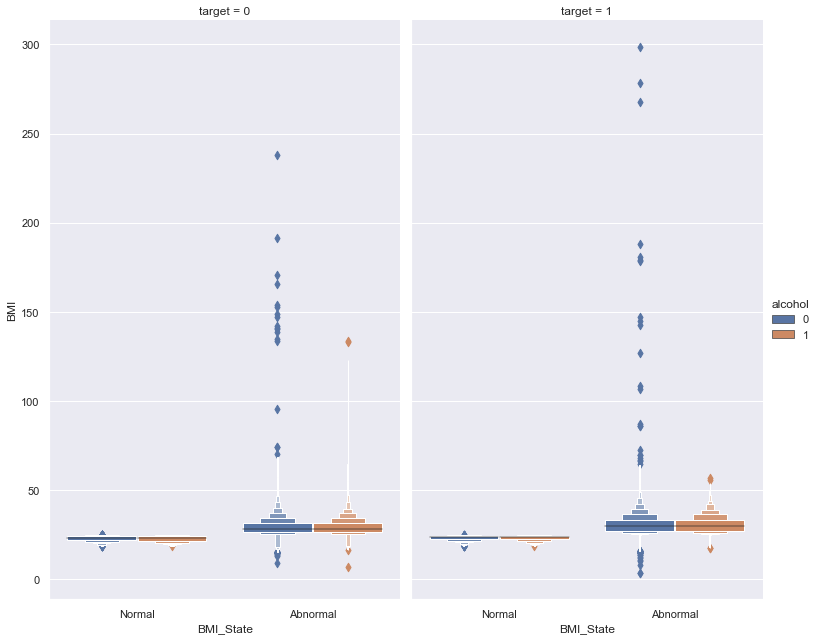

In [51]:
# comparison plot with alcohol consumption with CVD patients
sns.catplot(x="BMI_State", y="BMI" , hue="alcohol", col="target", data=data, kind="boxen", height=9, aspect=.6);

The plot explains both normal & abnormal person are having equal level of alcohol consumption people for cardio & non cardio patients . So the alcohol factor is not highly influencing the BMI factor. But we need to check whether alcohol consumption impacts cardio diesease.

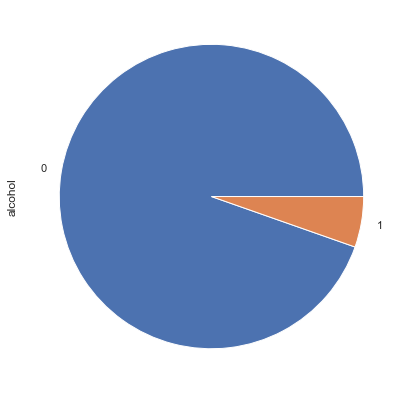

In [52]:
# Alcohol consumption 
data["alcohol"].value_counts().plot(kind='pie')

The patients are majorly alcoholic. we need to check , the alcoholic are prone to cardio disease.

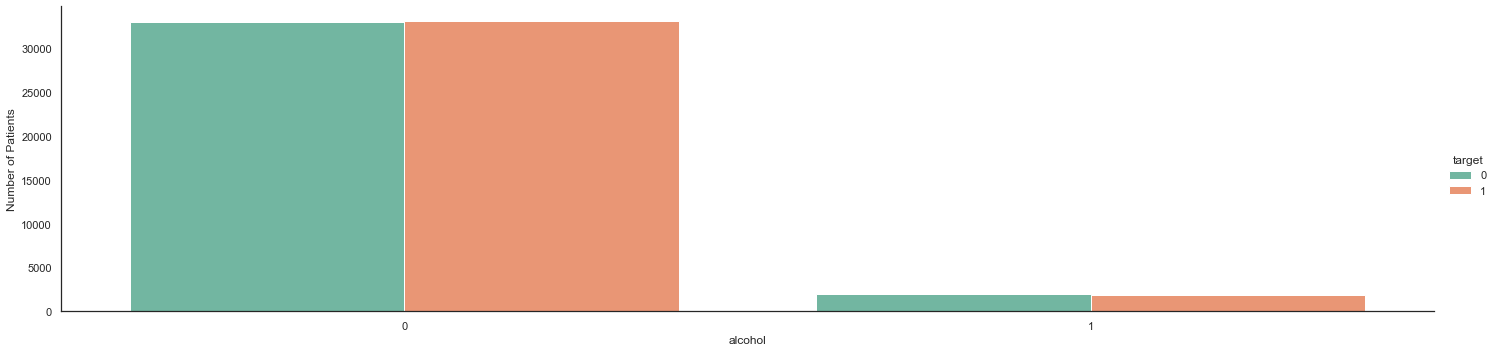

In [53]:
with sns.axes_style('white'):
    g = sns.factorplot("alcohol", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

By plots and dataset given , alcohol consumption does not seem to be contributing feature to cardio disease classification. If alcohol consumption seems to be factor it should have high cardio disease count.

Now let us take a look for smoking and physical activity factor.

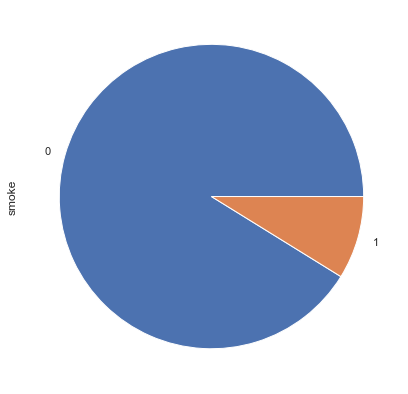

In [54]:
data["smoke"].value_counts().plot(kind='pie')

The patients are majorly smokers. we need to check , the smokers are prone to cardio disease.

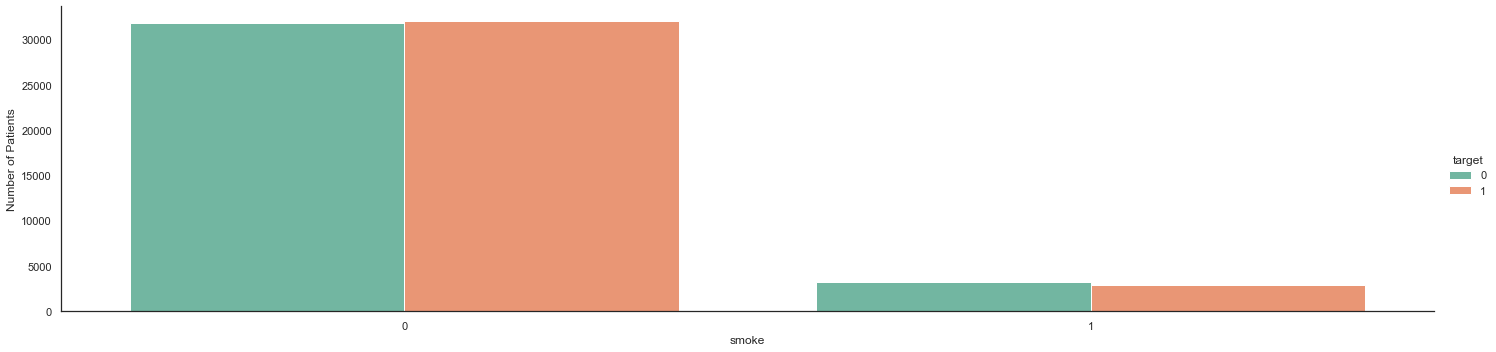

In [55]:
with sns.axes_style('white'):
    g = sns.factorplot("smoke", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

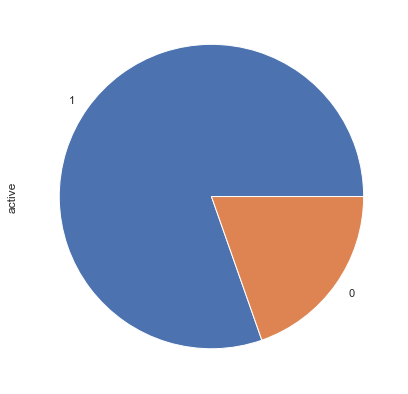

In [56]:
data["active"].value_counts().plot(kind='pie')

There are more physically inactive people in the dataset.

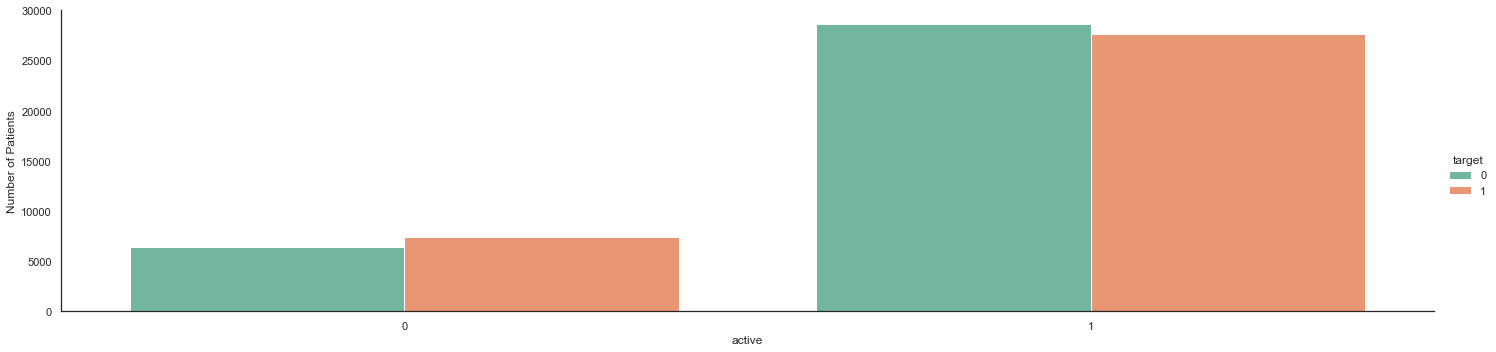

In [57]:
with sns.axes_style('white'):
    g = sns.factorplot("active", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

This analysis gives a nice picture stating that physically active people are not prone to cardio disease comparing to physicall active people suffers from cardio disease.

From this three external features and its visualization , we can conclude that:

Alcohol : There are more alcoholic patients compare to alcoholic.
    
Smoking : There are more smokers compare to non-smokers.
    
Physical Activity : There are more physically inactive patients compare to physically active people. The physical active people are less prone to this CVD.

<Figure size 288x216 with 0 Axes>

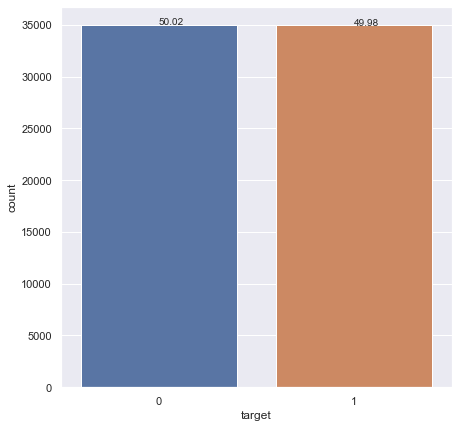

In [58]:
# Let us first have a look at our target variable.
plt.figure(figsize=(4,3))
fig, ax = plt.subplots(1,1)
sns.countplot(data['target'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}'.format((i.get_height()/len(data['target']))*100,'%'))
plt.show()

No handles with labels found to put in legend.


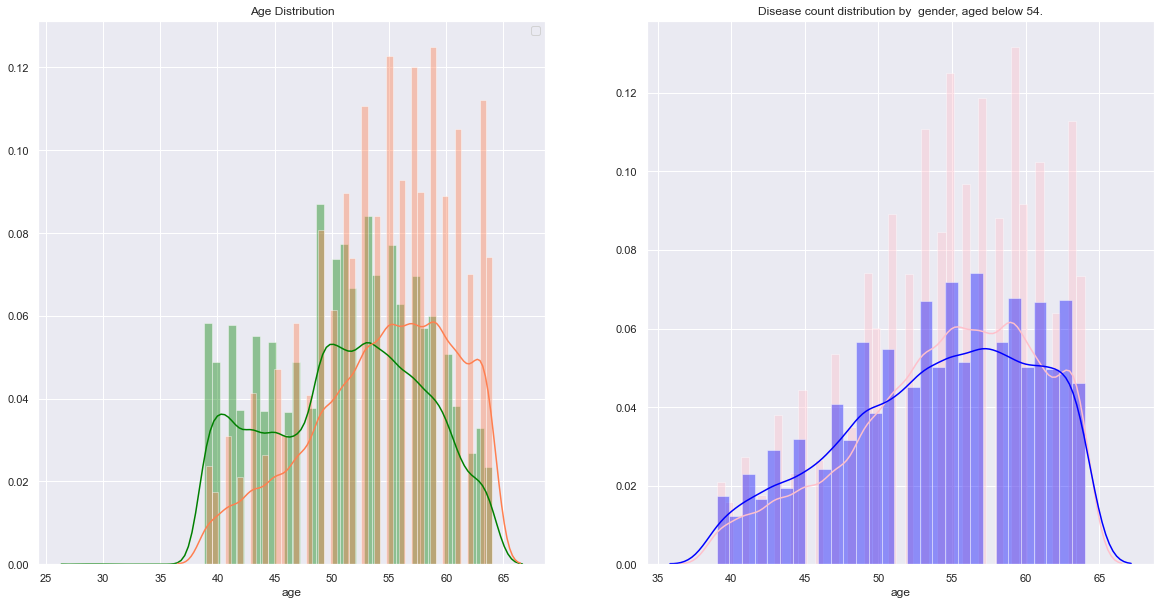

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data['age'][data['target']==0], ax = ax1, color='green')
sns.distplot(data['age'][data['target']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend()

sns.distplot(data['age'][(data['gender']==1) & (data['target']==1)],ax = ax2,color='pink')
sns.distplot(data['age'][(data['gender']==2) & (data['target']==1)],ax = ax2,color='blue')
ax2.set_title('Disease count distribution by  gender, aged below 54.')
plt.show()

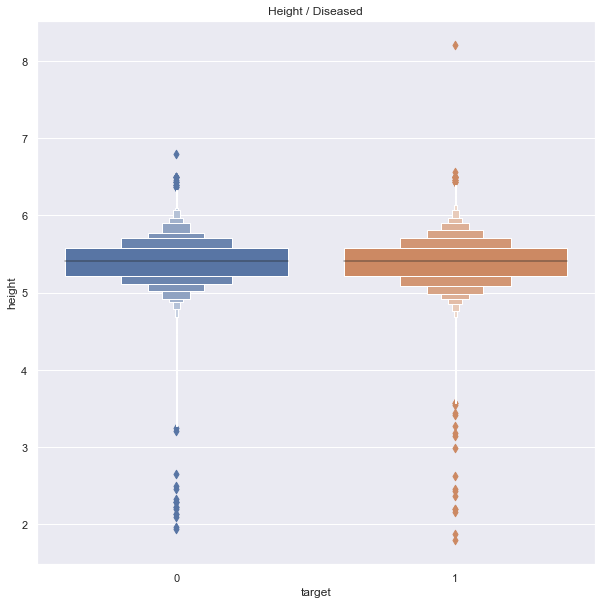

In [60]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(data['target'],(data['height']*0.0328084),ax=ax1)
ax1.set_title('Height / Diseased')
plt.show()

From the above plot we can see that there are certain outliers in the feature. For eg: There are persons with more than 8 foot height which definitely looks and outlier Also, there are few with even less then 3 foot in height which could be children. To confirm this we need to check their weight and age and decide if they are outliers or could be a valid entry.

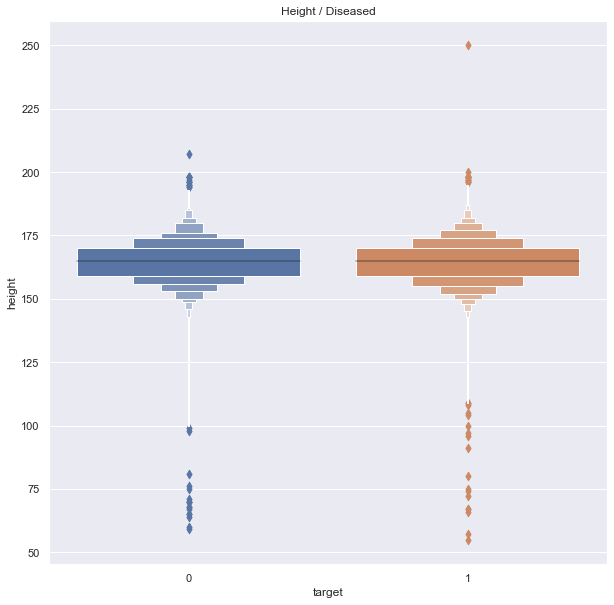

In [61]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(data['target'],(data['height']),ax=ax1)
ax1.set_title('Height / Diseased')
plt.show()

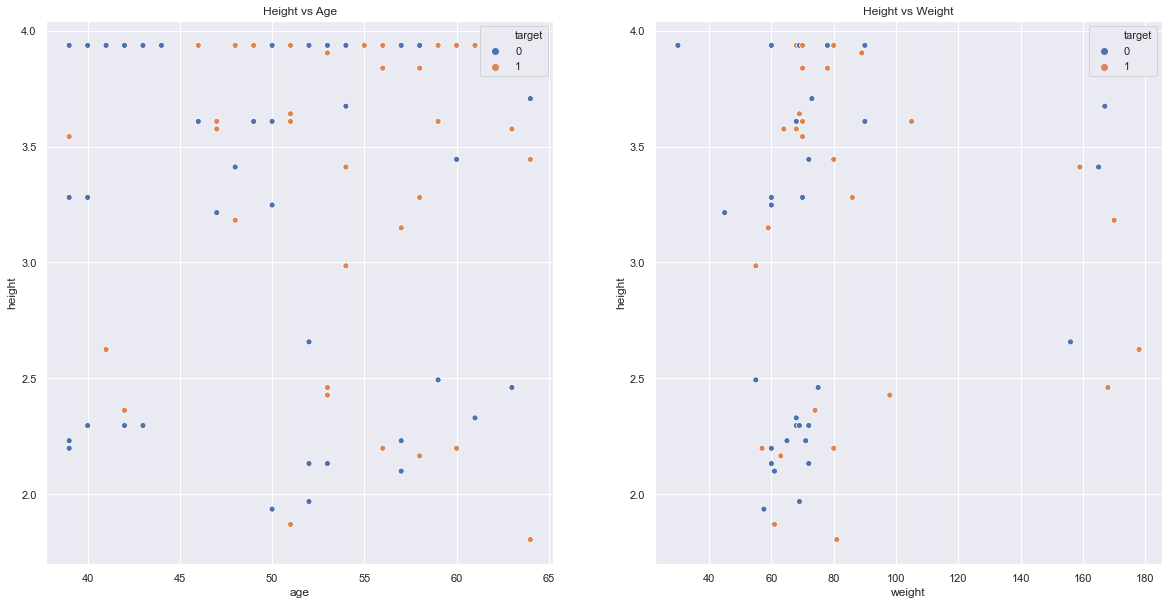

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(data['age'],data['height'][(data['height']*0.0328084)<4]*0.0328084,hue=data['target'],ax=ax1)
ax1.set_title('Height vs Age')
sns.scatterplot(data['weight'],data['height'][(data['height']*0.0328084)<4]*0.0328084,hue=data['target'],ax=ax2)
ax2.set_title('Height vs Weight')
plt.show()

From the above we can see that the people with below 4 foot in height are mostly aged above 40 and have a weight above 40kg mostly. This definitely confirms that they are not children. Now for our analytical purposes we can delete such records from our data as they are hinting more towards outliers.

In [63]:
#Converting height in cms to foot.
data['height'] = data['height']*0.0328084 
filt =(data['height']>8) | (data['height']<3) 

data.drop(index = list(data[filt].index),inplace=True)
print(f'Dataset: {data.shape}')

Dataset: (69950, 17)


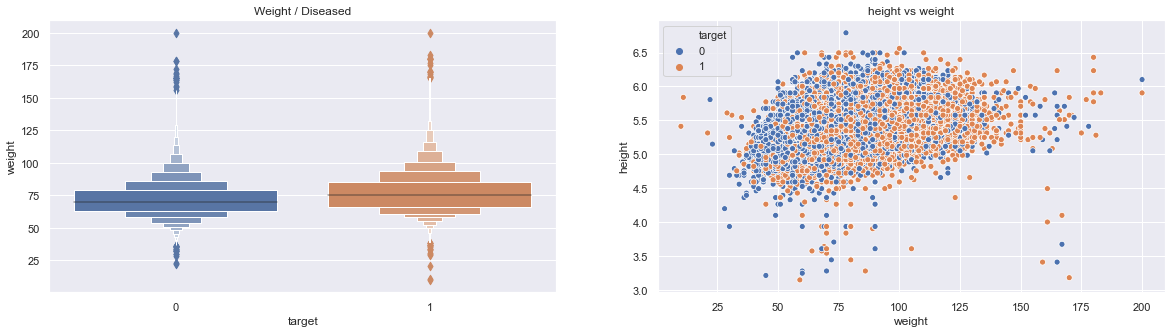

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxenplot(data['target'],(data['weight']),ax=ax1)
ax1.set_title('Weight / Diseased')
sns.scatterplot(data['weight'],data['height'],ax=ax2,hue=data['target'])
ax2.set_title('height vs weight')
plt.show()

From the above plots we can see that there are persons with more than 155 kgs of weight with height less than 4.5 foot which seems like a bit abnormal. Also, there are people with less than 25kg of weight and there are ones with more than 175 kg of weight which looks like an outlier to me. We will eliminate all such records from our analysis.

In [65]:
# 1. Weight < 25 kg
filt1 = data['weight']<25
data.drop(index=list(data[filt1].index),inplace=True)

# 2. Weight > 175 kg
filt2 = data['weight']>175
data.drop(index=list(data[filt2].index),inplace=True)

# 3. Height < 4.5 & Weight > 150 kg
filt3 = (data['height']<4.5) & (data['weight']>150)
data.drop(index=list(data[filt3].index),inplace=True)

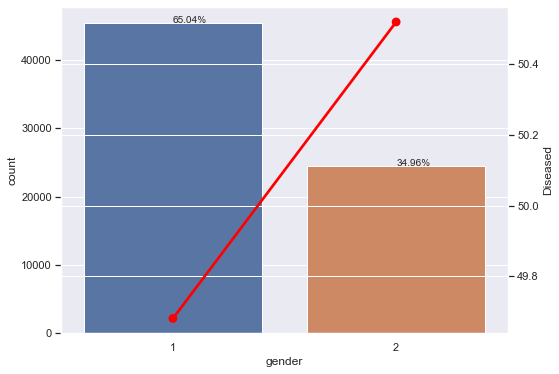

In [66]:
# Gender
fig,(ax) = plt.subplots(1,1, figsize=(8,6))
tmp = pd.crosstab(data['gender'],data['target'],normalize='index').round(4)*100
tmp.columns = ['Not Diseased','Diseased']
ax1 = sns.countplot(data['gender'])
ax2 = ax1.twinx()
sns.pointplot(tmp.index,tmp['Diseased'],ax=ax2, color='red')
for x in ax1.patches:
    height = x.get_height()
    ax1.text(x.get_x()+x.get_width()/2,height,'{:.2f}{}'.format((height/len(data))*100,'%'))
plt.show()

Looks like women are more likely to have diseased then men.

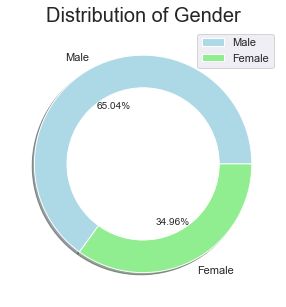

In [67]:
size = data['gender'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"


my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size,colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [68]:
# systolic
filt = (data['systolic']<90) | (data['systolic']>140)
print(f'Normal systolic blood pressure range is between 90 and 120. However, from our dataset we can see that we have {len(data[filt])} records that are not falling within the normal range. We can replace them with their median values.')

Normal systolic blood pressure range is between 90 and 120. However, from our dataset we can see that we have 10206 records that are not falling within the normal range. We can replace them with their median values.


In [69]:
data['systolic'].replace(data[filt]['systolic'].values,data['systolic'].median(),inplace=True)

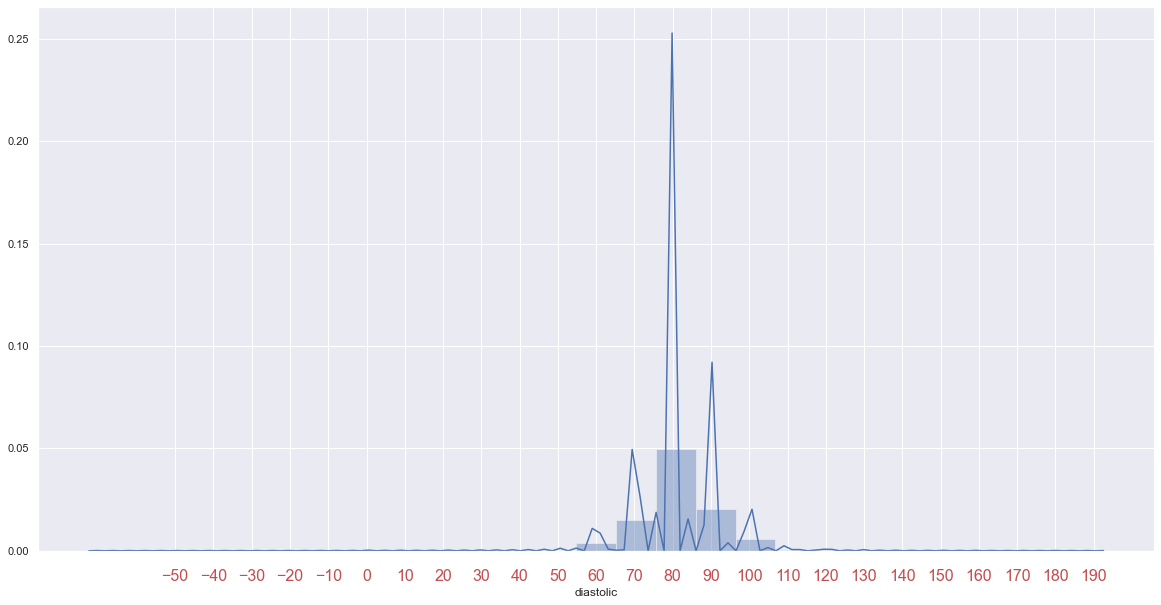

Similar to Systolic Blood Pressure Range the diastolic bp range should be between 60-90 for a healthy individual. However, in this case we have median values for diastolic as 80.0 which does not look correct to me. Considering this in mind we would have to do some further analysis if the data source is correct or not.


In [70]:
# filt =  (data['ap_lo']>90) | (data['ap_lo']<60)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.distplot(data['diastolic'][data['diastolic']<200],bins = 25, kde = True, ax = ax)
xticks = [i*10 for i in range(-5,20)]
ax.set_xticks(xticks)
ax.tick_params(axis='x',labelsize = 16, pad = 12,  
               colors ='r')
plt.show()
print(f'Similar to Systolic Blood Pressure Range the diastolic bp range should be between 60-90 for a healthy individual. However, in this case we have median values for diastolic as {data.diastolic.median()} which does not look correct to me. Considering this in mind we would have to do some further analysis if the data source is correct or not.')

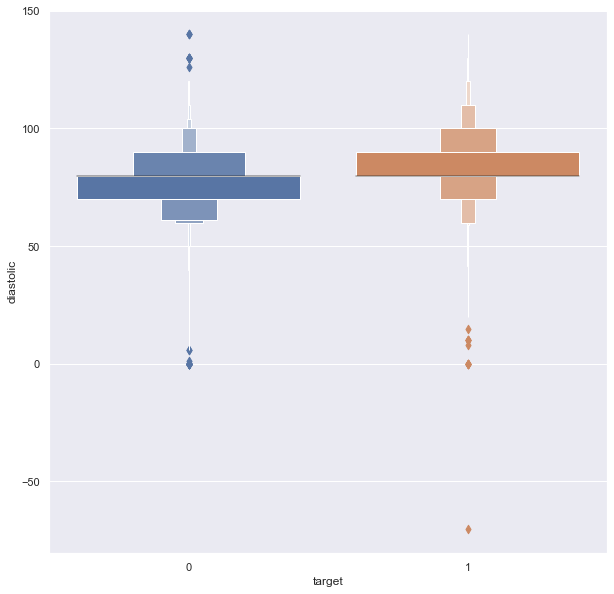

In [71]:
plt.figure(figsize=(10,10))
sns.boxenplot(data['target'],data['diastolic'][data['diastolic']<150])
plt.show()

In [72]:
data.tail(5)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
69995,52,2,5.511811,76.0,120,80,1,1,1,0,1,0,Middle Aged,60s,26.927438,40,Abnormal
69996,61,1,5.183727,126.0,140,90,2,2,0,0,1,1,Middle Aged,70+,50.472681,50,Abnormal
69997,52,2,6.003937,105.0,120,90,3,1,0,1,0,1,Middle Aged,60s,31.353579,90,Abnormal
69998,61,1,5.347769,72.0,135,80,1,2,0,0,0,1,Middle Aged,70+,27.099251,55,Abnormal
69999,56,1,5.577428,72.0,120,80,2,1,0,0,1,0,Middle Aged,60s,24.913495,40,Normal


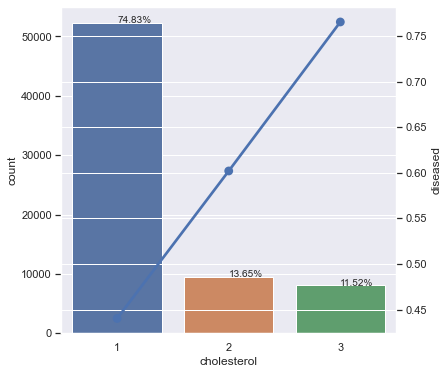

In [73]:
# cholesterol
tmp = pd.crosstab(data['cholesterol'],data['target'],normalize='index')
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1, figsize=(6,6))
sns.countplot(data['cholesterol'], ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['cholesterol'])*100,'%'))
plt.show()

The above plot shows that cholesterol has a great impact over the diseased state of a person.

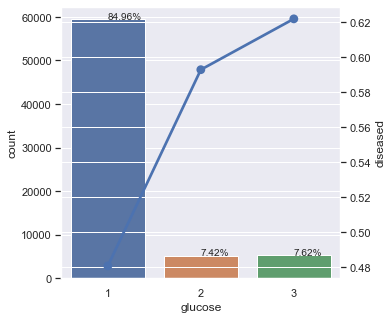

In [74]:
# Glucose
tmp = pd.crosstab(data['glucose'],data['target'],normalize='index')
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1)
sns.countplot(data['glucose'], ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['glucose'])*100,'%'))
plt.show()

Similar to cholesterol, a person with high glucose levels is also more prone to have got diseased. Diabetic people BEWARE ! We would now combine the smoking and alcohol habbits of a person into a single feature 'smoke/alcohol' and study its impact

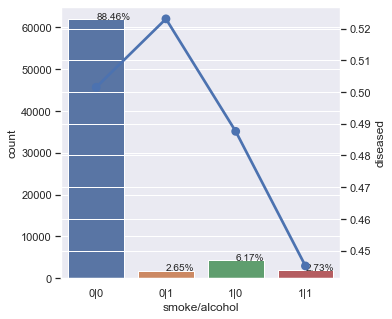

In [75]:
data['smoke/alcohol'] = data['smoke'].apply(str)+'|'+data['alcohol'].apply(str)

tmp = pd.crosstab(data['smoke/alcohol'],data['target'],normalize='index')
tmp.columns = ['Not diseased','diseased']

fig, ax = plt.subplots(1,1)
sns.countplot(data['smoke/alcohol'], ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['smoke/alcohol'])*100,'%'))
plt.show()

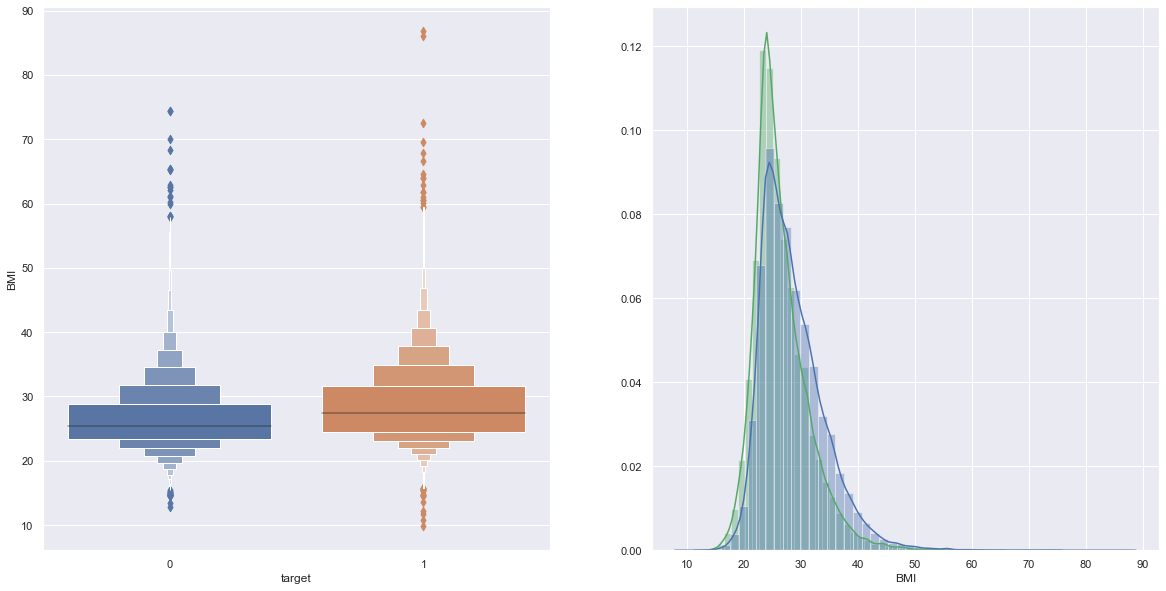

In [76]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.boxenplot(data['target'],data['BMI'],ax=ax1)
sns.distplot(data[data['target']==0]['BMI'],color='g',ax=ax2)
sns.distplot(data[data['target']==1]['BMI'],color='b',ax=ax2)
plt.show()

From the above plot we can see that chances of people getting diseased is more when there BMI increases beyond 25.

In [77]:
def categorize_blood_pressure(x):
  if x['systolic'] < 120 and x['diastolic'] < 80:
    return "Normal"
  elif 120 <= x['systolic'] <= 129 and x['diastolic'] < 80:
    return "Elevated"
  elif 130 <= x['systolic'] <= 139 or 80 <= x['diastolic'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['systolic'] <= 180 or 90 <= x['diastolic'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['systolic'] > 180 and  x['diastolic'] > 120) or (x['systolic'] > 180 or x['diastolic'] > 120):
    return "Hypertensive Crisis"

In [78]:
# categorizing blood pressure
data['blood_category'] = data.apply(categorize_blood_pressure, axis=1)
 
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State,smoke/alcohol,blood_category
0,50,2,5.511811,62.0,110,80,1,1,0,0,1,0,Middle Aged,50s,21.967120,30,Normal,0|0,High Blood Pressure(Stage 1)
1,55,1,5.118110,85.0,140,90,3,1,0,0,1,1,Middle Aged,60s,34.927679,50,Abnormal,0|0,High Blood Pressure(Stage 2)
2,51,1,5.413386,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,60,Normal,0|0,High Blood Pressure(Stage 1)
3,48,2,5.544620,82.0,120,100,1,1,0,0,1,1,Middle Aged,50s,28.710479,50,Abnormal,0|0,High Blood Pressure(Stage 2)
4,47,1,5.118110,56.0,100,60,1,1,0,0,0,0,Middle Aged,50s,23.011177,40,Normal,0|0,Normal


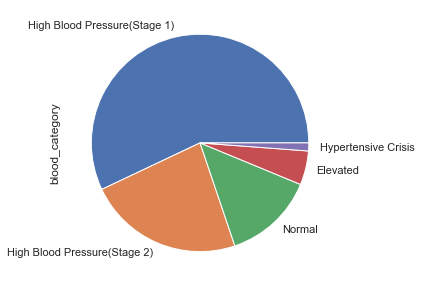

In [79]:
# Visulization of blood pressure category
data["blood_category"].value_counts().plot(kind='pie')

Most of them are in elevated condition followed by stage 2 and normal.

Let us see which are the categories are mostly suffering from cardio disease.

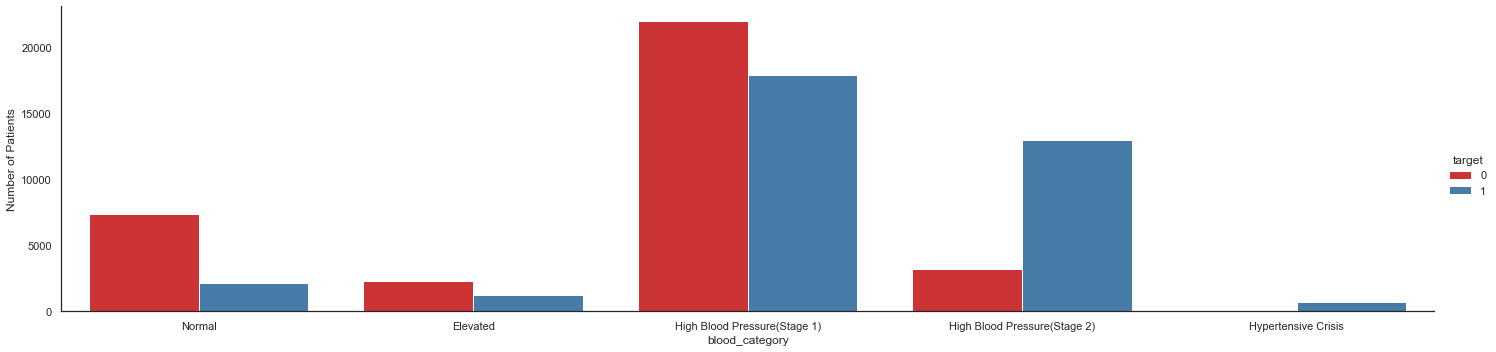

In [80]:
with sns.axes_style('white'):
    g = sns.factorplot("blood_category", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set1", order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
    g.set_ylabels('Number of Patients')

This visualization clearing stating that high blood pressure stage 1 and  2 are prone to cardio disease . This feature is highly correlating with the target variable.

Coming to the Cholestrol feature

According to medical study , When there is too much cholesterol in your blood, it builds up in the walls of your arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and blood flow to the heart muscle is slowed down or blocked. The blood carries oxygen to the heart, and if not enough blood and oxygen reach your heart, you may suffer chest pain.

The visualization have to prove that patients having well above normal and above normal should have high ratio of cvd compare to normal patients.

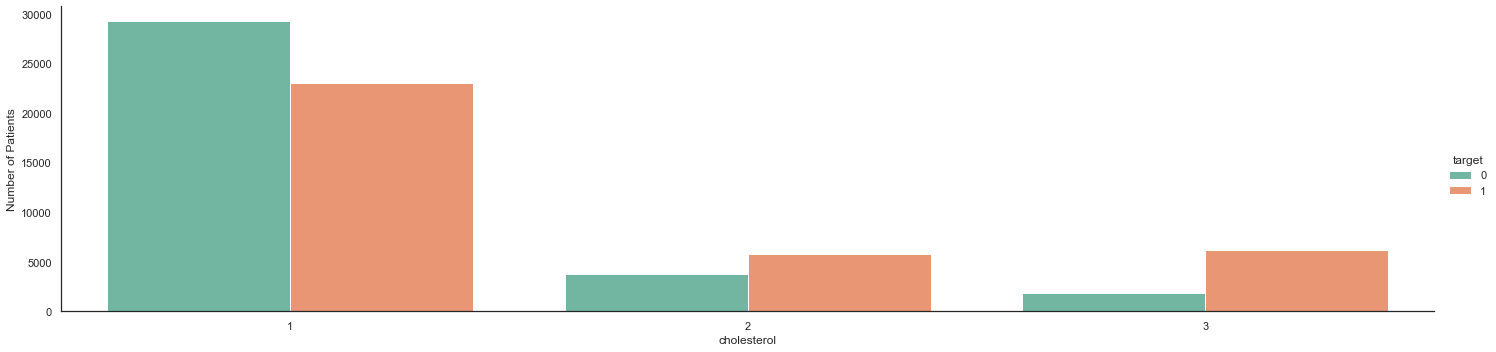

In [81]:
with sns.axes_style('white'):
    g = sns.factorplot("cholesterol", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

From this we can infer that , the patients who are having above normal & well above normal are the highest risk patient for CVD compare to the normal level cholestrol patients.

Next is the glucose realation with CVD. But medical studies claiming that the glucose levels are not helpful for impacting CVD target. But anyway we make graph to check that.

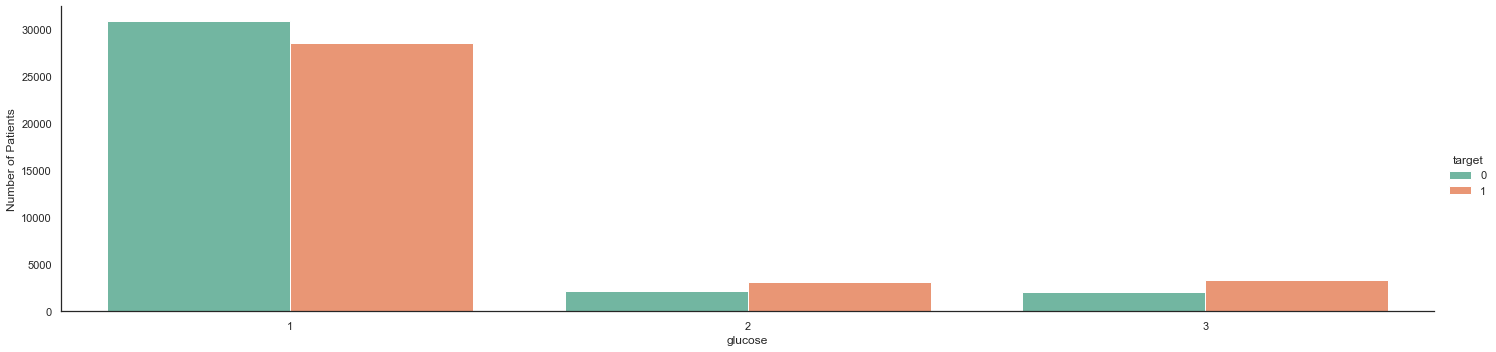

In [82]:
with sns.axes_style('white'):
    g = sns.factorplot("glucose", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

Yup thats great, this shows most are maintaining normal glucose level and abnormal patients have high risk to CVD.

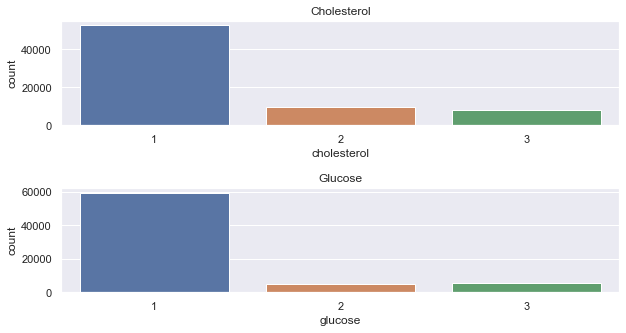

In [83]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.subplot(2,1,1)
sns.countplot('cholesterol', data= data)
plt.title('Cholesterol')

plt.subplot(2,1,2)
sns.countplot('glucose', data= data)
plt.title('Glucose')

plt.subplots_adjust(hspace= 0.6)
plt.show()

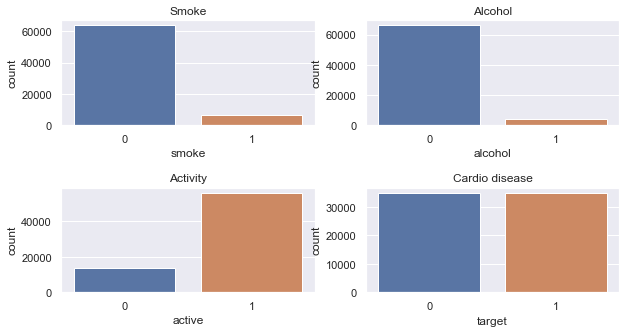

In [84]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.subplot(2,2,1)
sns.countplot('smoke', data = data)
plt.title('Smoke')

plt.subplot(2,2,2)
sns.countplot('alcohol', data = data)
plt.title('Alcohol')

plt.subplot(2,2,3)
sns.countplot('active', data = data)
plt.title('Activity')

plt.subplot(2,2,4)
sns.countplot('target', data = data)
plt.title('Cardio disease')

plt.subplots_adjust(hspace= 0.6)
plt.show()

Finally we make correlation graph with the engineered features and selected ones, they are : *

In [85]:
# Filtering out the required features
new_data = data[["gender","age","age_tees","height","BMI","BMI_State","cholesterol","glucose","smoke","alcohol","active","blood_category","pulse pressure","target"]].copy()
new_data.head()

,gender,age,age_tees,height,BMI,BMI_State,cholesterol,glucose,smoke,alcohol,active,blood_category,pulse pressure,target
0,2,50,50s,5.511811,21.967120,Normal,1,1,0,0,1,High Blood Pressure(Stage 1),30,0
1,1,55,60s,5.118110,34.927679,Abnormal,3,1,0,0,1,High Blood Pressure(Stage 2),50,1
2,1,51,60s,5.413386,23.507805,Normal,3,1,0,0,0,High Blood Pressure(Stage 1),60,1
3,2,48,50s,5.544620,28.710479,Abnormal,1,1,0,0,1,High Blood Pressure(Stage 2),50,1
4,1,47,50s,5.118110,23.011177,Normal,1,1,0,0,0,Normal,40,0


In [86]:
# Checking any missing values
new_data.isnull().sum()

gender            0
age               0
age_tees          0
height            0
BMI               0
BMI_State         0
cholesterol       0
glucose           0
smoke             0
alcohol           0
active            0
blood_category    0
pulse pressure    0
target            0
dtype: int64

In [87]:
categorical_val = []
continous_val = []
for column in new_data.columns:
    print('==============================')
    print(f"{column} : {new_data[column].unique()}")
    if len(new_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

gender : [2 1]
age : [50 55 51 48 47 59 60 61 54 40 39 45 58 63 64 53 49 57 56 46 43 62 52 42
 41 44 29 30]
age_tees : ['50s' '60s' '70+' '40s' '20s']
height : [5.5118112 5.1181104 5.413386  5.5446196 4.9540684 5.1509188 5.8398952
 5.1837272 5.3805776 5.6758532 5.9383204 5.6430448 5.577428  5.0524936
 5.3149608 5.3477692 5.0196852 5.2165356 5.4461944 5.085302  5.249344
 5.74147   5.6102364 4.9868768 6.1351708 4.8556432 5.8727036 5.905512
 6.1679792 6.069554  5.4790028 6.0039372 5.7086616 5.7742784 5.2821524
 6.0367456 5.8070868 5.9711288 4.8884516 4.6587928 4.92126   4.7244096
 4.8228348 4.7900264 4.6259844 6.397638  4.593176  6.4960632 6.1023624
 4.757218  4.6916012 6.4304464 4.5275592 6.3648296 6.233596  4.3963256
 4.4619424 3.28084   3.937008  6.2007876 4.4947508 6.2992128 6.2664044
 3.8385828 3.9041996 4.265092  3.608924  6.3320212 4.3307088 4.429134
 4.5603676 4.3635172 3.2152232 6.7913388 3.5761156 4.10105   6.4632548
 4.1994752 3.444882  3.5433072 6.56168   3.6417324 3.7073492 3

In [88]:
categorical_val

['gender',
 'age_tees',
 'BMI_State',
 'cholesterol',
 'glucose',
 'smoke',
 'alcohol',
 'active',
 'blood_category',
 'target']

In [89]:
# Label encode the categorical columns BMI_State & blood category
le = preprocessing.LabelEncoder()

# BMI_State
le.fit(new_data['BMI_State'])
new_data['BMI_State'] = le.transform(new_data['BMI_State'])

# blood category
le.fit(new_data['blood_category'])
new_data['blood_category'] = le.transform(new_data['blood_category'])

# age tees
le.fit(new_data['age_tees'])
new_data['age_tees'] = le.transform(new_data['age_tees'])

new_data.head()

,gender,age,age_tees,height,BMI,BMI_State,cholesterol,glucose,smoke,alcohol,active,blood_category,pulse pressure,target
0,2,50,2,5.511811,21.967120,1,1,1,0,0,1,1,30,0
1,1,55,3,5.118110,34.927679,0,3,1,0,0,1,2,50,1
2,1,51,3,5.413386,23.507805,1,3,1,0,0,0,1,60,1
3,2,48,2,5.544620,28.710479,0,1,1,0,0,1,2,50,1
4,1,47,2,5.118110,23.011177,1,1,1,0,0,0,4,40,0


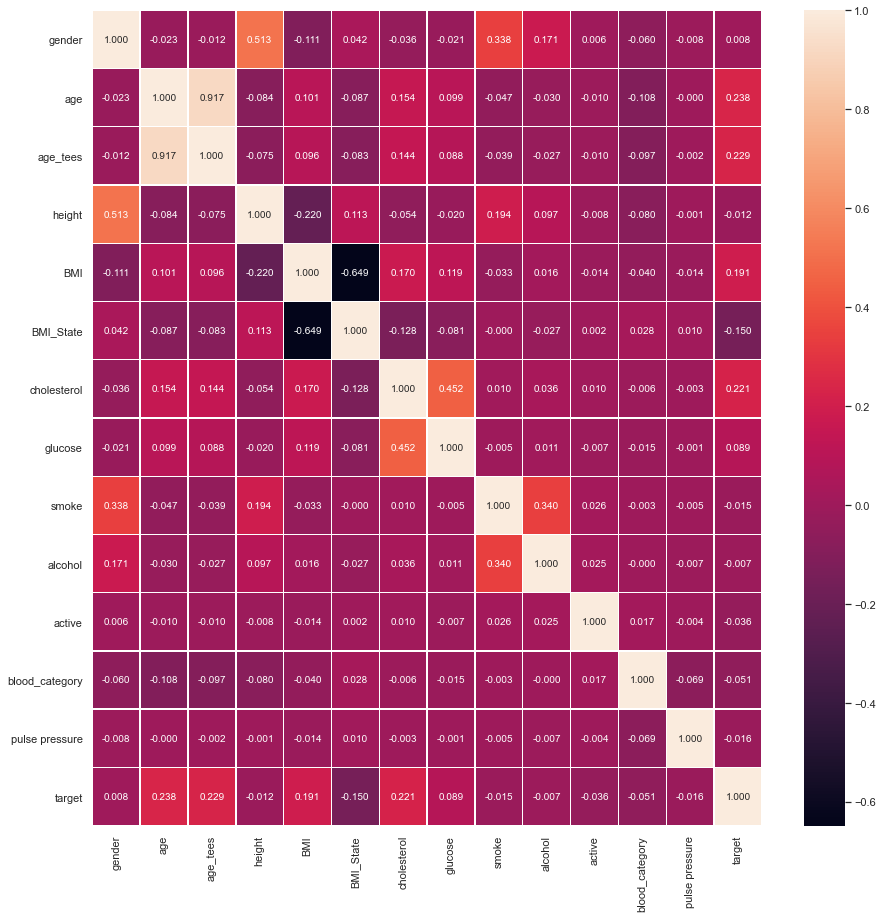

In [90]:
#### plotting correlation map
corr = new_data.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.4, ax=ax)

In [91]:
new_data.head(5)

,gender,age,age_tees,height,BMI,BMI_State,cholesterol,glucose,smoke,alcohol,active,blood_category,pulse pressure,target
0,2,50,2,5.511811,21.967120,1,1,1,0,0,1,1,30,0
1,1,55,3,5.118110,34.927679,0,3,1,0,0,1,2,50,1
2,1,51,3,5.413386,23.507805,1,3,1,0,0,0,1,60,1
3,2,48,2,5.544620,28.710479,0,1,1,0,0,1,2,50,1
4,1,47,2,5.118110,23.011177,1,1,1,0,0,0,4,40,0


In [92]:
new_data.shape

(69927, 14)

# Preparing to modeling


In [93]:
new_data = new_data[["gender","age","BMI_State","cholesterol","glucose","blood_category","smoke","alcohol","active","target"]]

In [94]:
new_data.head()

,gender,age,BMI_State,cholesterol,glucose,blood_category,smoke,alcohol,active,target
0,2,50,1,1,1,1,0,0,1,0
1,1,55,0,3,1,2,0,0,1,1
2,1,51,1,3,1,1,0,0,0,1
3,2,48,0,1,1,2,0,0,1,1
4,1,47,1,1,1,4,0,0,0,0


In [95]:

#categorical_val.remove('target')
#new_data = pd.get_dummies(new_data, columns = categorical_val)

In [96]:
new_data.head()

,gender,age,BMI_State,cholesterol,glucose,blood_category,smoke,alcohol,active,target
0,2,50,1,1,1,1,0,0,1,0
1,1,55,0,3,1,2,0,0,1,1
2,1,51,1,3,1,1,0,0,0,1
3,2,48,0,1,1,2,0,0,1,1
4,1,47,1,1,1,4,0,0,0,0


In [97]:
#print(data.columns)
print(new_data.columns)

Index(['gender', 'age', 'BMI_State', 'cholesterol', 'glucose',
       'blood_category', 'smoke', 'alcohol', 'active', 'target'],
      dtype='object')


In [98]:
#from sklearn.preprocessing import StandardScaler

#s_sc = StandardScaler()
#col_to_scale = ['age', 'pulse pressure', 'height', 'BMI']
#new_data[col_to_scale] = s_sc.fit_transform(new_data[col_to_scale])

In [99]:
new_data.head()

,gender,age,BMI_State,cholesterol,glucose,blood_category,smoke,alcohol,active,target
0,2,50,1,1,1,1,0,0,1,0
1,1,55,0,3,1,2,0,0,1,1
2,1,51,1,3,1,1,0,0,0,1
3,2,48,0,1,1,2,0,0,1,1
4,1,47,1,1,1,4,0,0,0,0


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

I split data on 30% in the test dataset, the remaining 70% - in the training dataset

In [101]:
from sklearn.model_selection import train_test_split

X = new_data.drop('target', axis=1)
y = new_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                                                    

In [102]:
X_train.head(10)

,gender,age,BMI_State,cholesterol,glucose,blood_category,smoke,alcohol,active
15515,2,64,0,2,2,2,0,0,1
15048,1,55,0,2,1,2,0,0,1
36205,1,60,1,1,1,1,0,0,1
65105,2,49,1,2,1,1,0,0,1
5415,1,52,0,2,1,1,0,0,1
63284,2,52,0,3,1,1,0,0,1
8450,2,57,0,1,1,1,0,0,1
40560,2,63,0,1,1,1,0,0,1
1359,2,61,0,3,3,2,0,0,1
42501,1,54,0,1,1,1,0,0,1


In [103]:
X_test.head(10)

,gender,age,BMI_State,cholesterol,glucose,blood_category,smoke,alcohol,active
13992,2,49,0,3,1,2,0,0,0
29704,2,54,1,1,1,1,0,0,1
25194,1,55,0,1,1,2,0,0,1
26298,1,52,0,3,3,1,0,0,1
36952,2,47,1,2,1,2,0,0,1
54281,1,54,0,1,1,1,0,0,0
34365,2,43,0,1,1,2,0,0,0
27874,1,55,0,2,1,1,0,0,1
33215,1,57,0,2,1,1,0,0,1
11316,2,53,1,1,1,1,0,0,1


In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48948 entries, 15515 to 15810
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          48948 non-null  int64
 1   age             48948 non-null  int64
 2   BMI_State       48948 non-null  int32
 3   cholesterol     48948 non-null  int64
 4   glucose         48948 non-null  int64
 5   blood_category  48948 non-null  int32
 6   smoke           48948 non-null  int64
 7   alcohol         48948 non-null  int64
 8   active          48948 non-null  int64
dtypes: int32(2), int64(7)
memory usage: 3.4 MB


In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20979 entries, 13992 to 35941
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          20979 non-null  int64
 1   age             20979 non-null  int64
 2   BMI_State       20979 non-null  int32
 3   cholesterol     20979 non-null  int64
 4   glucose         20979 non-null  int64
 5   blood_category  20979 non-null  int32
 6   smoke           20979 non-null  int64
 7   alcohol         20979 non-null  int64
 8   active          20979 non-null  int64
dtypes: int32(2), int64(7)
memory usage: 1.4 MB


In [106]:
#%% split training set to validation set
#Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.3)
                                              

# Predictive modeling


Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 63.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.631453      0.639617  0.635368      0.635535      0.635523
recall         0.655327      0.615293  0.635368      0.635310      0.635368
f1-score       0.643168      0.627219  0.635368      0.635194      0.635217
support    24545.000000  24403.000000  0.635368  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[16085  8460]
 [ 9388 15015]]



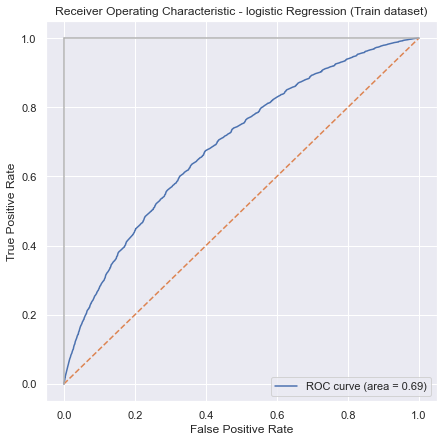

In [108]:
y_score1 = lr_clf.predict_proba(X_train)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, y_score1)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - logistic Regression (Train dataset)')
plt.plot(false_positive_rate1, true_positive_rate1, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score1))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()
    

In [109]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 62.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.620187      0.637410   0.62839      0.628799      0.628842
recall         0.652870      0.604155   0.62839      0.628512      0.628390
f1-score       0.636109      0.620337   0.62839      0.628223      0.628184
support    10437.000000  10542.000000   0.62839  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[6814 3623]
 [4173 6369]]



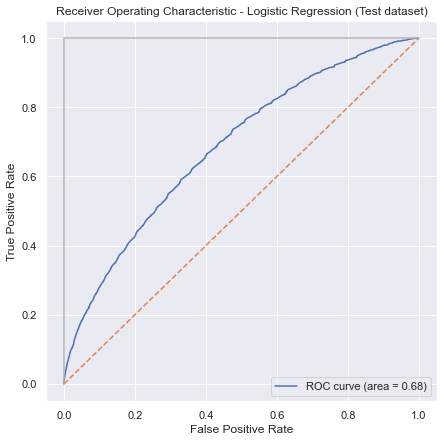

In [110]:
y_score2 = lr_clf.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Logistic Regression (Test dataset)')
plt.plot(false_positive_rate2, true_positive_rate2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score2))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()
    

In [111]:
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df


,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.83903


Random forest classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)



Train Result:
Accuracy Score: 74.02%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.719448      0.765709  0.740235      0.742578      0.742511
recall         0.790059      0.690120  0.740235      0.740090      0.740235
f1-score       0.753102      0.725952  0.740235      0.739527      0.739566
support    24545.000000  24403.000000  0.740235  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19392  5153]
 [ 7562 16841]]



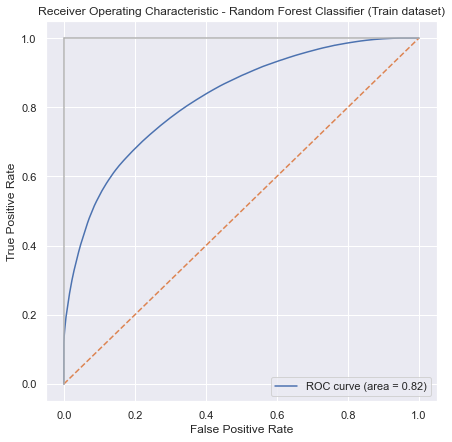

In [113]:
y_score5 = rf_clf.predict_proba(X_train)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_train, y_score5)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Random Forest Classifier (Train dataset)')
plt.plot(false_positive_rate5, true_positive_rate5, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score5))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [114]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 68.22%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.664399      0.703669  0.682206      0.684034      0.684132
recall         0.729903      0.634984  0.682206      0.682444      0.682206
f1-score       0.695612      0.667564  0.682206      0.681588      0.681518
support    10437.000000  10542.000000  0.682206  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7618 2819]
 [3848 6694]]



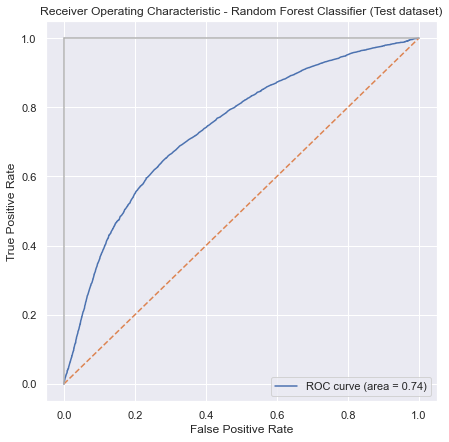

In [115]:
y_score6 = rf_clf.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Random Forest Classifier (Test dataset)')
plt.plot(false_positive_rate6, true_positive_rate6, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score6))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [116]:
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602


K nearest neighbour

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)


Train Result:
Accuracy Score: 69.31%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.690981      0.695390  0.693144      0.693185      0.693179
recall         0.702017      0.684219  0.693144      0.693118      0.693144
f1-score       0.696455      0.689759  0.693144      0.693107      0.693117
support    24545.000000  24403.000000  0.693144  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[17231  7314]
 [ 7706 16697]]



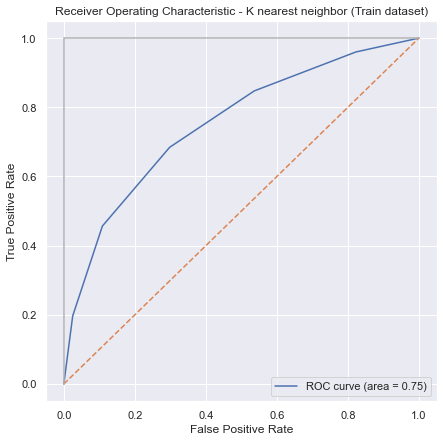

In [118]:
y_score7 = knn_clf.predict_proba(X_train)[:,1]
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_train, y_score7)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - K nearest neighbor (Train dataset)')
plt.plot(false_positive_rate7, true_positive_rate7, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score7))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [119]:
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 65.49%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.649944      0.660107  0.654941      0.655025      0.655051
recall         0.664080      0.645893  0.654941      0.654986      0.654941
f1-score       0.656936      0.652922  0.654941      0.654929      0.654919
support    10437.000000  10542.000000  0.654941  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[6931 3506]
 [3733 6809]]



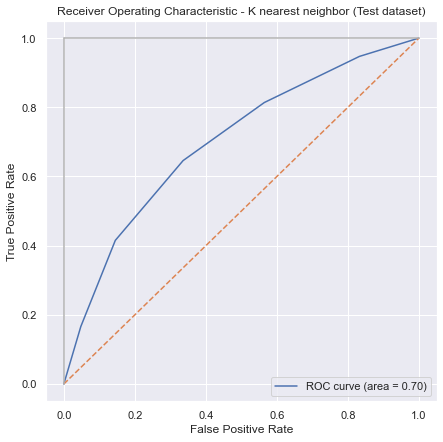

In [120]:
y_score8 = knn_clf.predict_proba(X_test)[:,1]
false_positive_rate8, true_positive_rate8, threshold8 = roc_curve(y_test, y_score8)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - K nearest neighbor (Test dataset)')
plt.plot(false_positive_rate8, true_positive_rate8, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score8))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [121]:
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602
2,K-nearest neighbors,69.314374,65.494065


Gaussian Naive Bayes

In [122]:
# Gaussian Naive Bayes

gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
print_score(gaussian_clf, X_train, y_train, X_test, y_test, train=True)


Train Result:
Accuracy Score: 63.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.618484      0.664673  0.637575      0.641578      0.641511
recall         0.723610      0.551039  0.637575      0.637324      0.637575
f1-score       0.666930      0.602545  0.637575      0.634737      0.634831
support    24545.000000  24403.000000  0.637575  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[17761  6784]
 [10956 13447]]



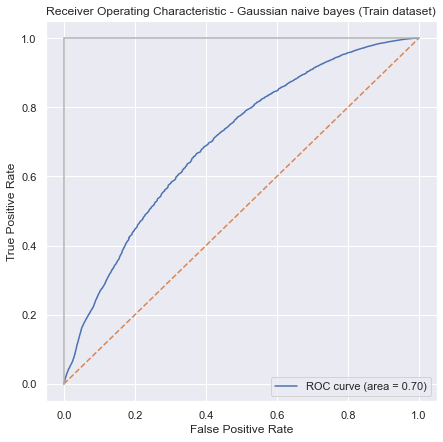

In [123]:
y_score9 = gaussian_clf.predict_proba(X_train)[:,1]
false_positive_rate9, true_positive_rate9, threshold9 = roc_curve(y_train, y_score9)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Gaussian naive bayes (Train dataset)')
plt.plot(false_positive_rate9, true_positive_rate9, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score9))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [124]:
print_score(gaussian_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 63.04%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.608929      0.661046   0.63044      0.634987      0.635118
recall         0.718789      0.542971   0.63044      0.630880      0.630440
f1-score       0.659314      0.596219   0.63044      0.627766      0.627608
support    10437.000000  10542.000000   0.63044  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7502 2935]
 [4818 5724]]



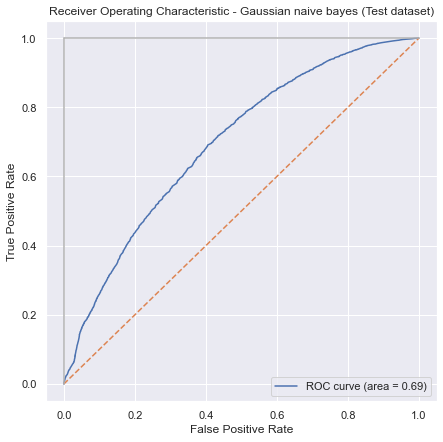

In [125]:
y_score10 = gaussian_clf.predict_proba(X_test)[:,1]
false_positive_rate10, true_positive_rate10, threshold10 = roc_curve(y_test, y_score10)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Gaussian naive bayes (Test dataset)')
plt.plot(false_positive_rate10, true_positive_rate10, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score10))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [126]:
train_score = accuracy_score(y_train, gaussian_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, gaussian_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Gaussian naive bayes", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996


Support vector machine

In [127]:
#percept_clf = Perceptron()
#percept_clf.fit(X_train, y_train)

from sklearn.svm import SVC
#from nltk.classify.scikitlearn import SklearnClassifier
#from sklearn.svm import LinearSVC, SVC


#svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
#svm_clf = SklearnClassifier(SVC(kernel='linear',probability=True))

svm_clf = SVC(kernel='rbf',probability=True)

svm_clf = svm_clf.fit(X_train, y_train)

#classifier = SklearnClassifier(LinearSVC())

#classifier = classifier.fit(X_train, X_test)
            
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)


Train Result:
Accuracy Score: 62.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.611663      0.651711  0.628422      0.631687      0.631629
recall         0.709350      0.547023  0.628422      0.628187      0.628422
f1-score       0.656895      0.594796  0.628422      0.625845      0.625935
support    24545.000000  24403.000000  0.628422  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[17411  7134]
 [11054 13349]]



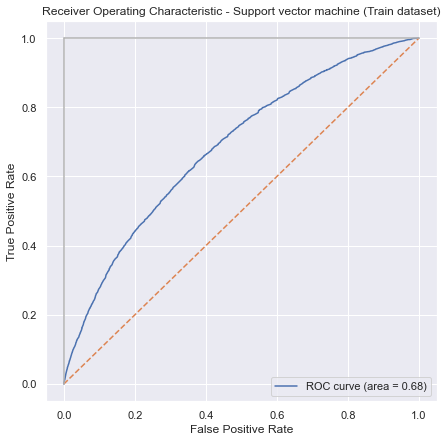

In [128]:
y_score11 = svm_clf.predict_proba(X_train)[:,1]
false_positive_rate11, true_positive_rate11, threshold11 = roc_curve(y_train, y_score11)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Support vector machine (Train dataset)')
plt.plot(false_positive_rate11, true_positive_rate11, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score11))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [129]:
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 62.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.605599      0.653201  0.625483      0.629400      0.629519
recall         0.708824      0.542971  0.625483      0.625898      0.625483
f1-score       0.653159      0.593007  0.625483      0.623083      0.622932
support    10437.000000  10542.000000  0.625483  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7398 3039]
 [4818 5724]]



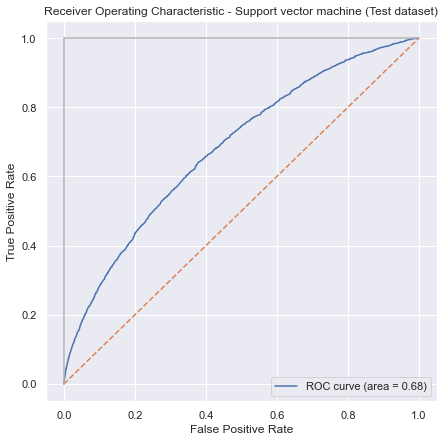

In [130]:
y_score12 = svm_clf.predict_proba(X_test)[:,1]
false_positive_rate12, true_positive_rate12, threshold12 = roc_curve(y_test, y_score12)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Support vector machine (Test dataset)')
plt.plot(false_positive_rate12, true_positive_rate12, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score12))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [131]:
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Support vector macghine", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996
4,Support vector macghine,62.842200,62.548263


Decision tree

In [132]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 74.02%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.711310      0.778870  0.740235      0.745090      0.744992
recall         0.811204      0.668852  0.740235      0.740028      0.740235
f1-score       0.757980      0.719681  0.740235      0.738830      0.738886
support    24545.000000  24403.000000  0.740235  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19911  4634]
 [ 8081 16322]]



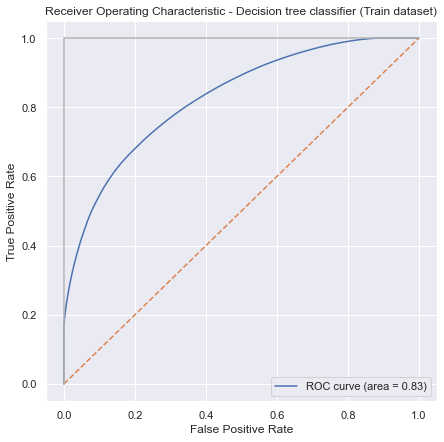

In [133]:
y_score13 = tree_clf.predict_proba(X_train)[:,1]
false_positive_rate13, true_positive_rate13, threshold13 = roc_curve(y_train, y_score13)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Decision tree classifier (Train dataset)')
plt.plot(false_positive_rate13, true_positive_rate13, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score13))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [134]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 67.46%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.651375      0.705135  0.674579      0.678255      0.678390
recall         0.744179      0.605673  0.674579      0.674926      0.674579
f1-score       0.694692      0.651630  0.674579      0.673161      0.673053
support    10437.000000  10542.000000  0.674579  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7767 2670]
 [4157 6385]]



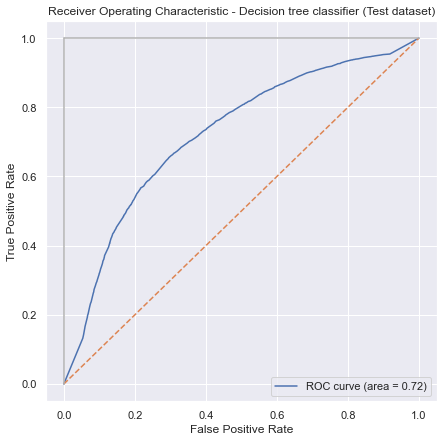

In [135]:
y_score14 = tree_clf.predict_proba(X_test)[:,1]
false_positive_rate14, true_positive_rate14, threshold14 = roc_curve(y_test, y_score14)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Decision tree classifier (Test dataset)')
plt.plot(false_positive_rate14, true_positive_rate14, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score14))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [136]:
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996
4,Support vector macghine,62.842200,62.548263
5,Decision Tree Classifier,74.023453,67.457934


Stochastic Gradient Descent

In [137]:
#stochastic gradient descent

#sgd_clf = SGDClassifier()
#sgd_clf.fit(X_train, y_train)
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss='hinge',class_weight='balanced')
sgd_clf =sgd.fit(X_train, y_train)
calibrator = CalibratedClassifierCV(sgd_clf, cv='prefit')
model=calibrator.fit(X_train, y_train)

#y_train_pred = model.predict_proba(X_tr)
#y_test_pred = model.predict_proba(X_te)


print_score(model, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 63.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.631500      0.644523  0.637636      0.638012      0.637993
recall         0.666001      0.609105  0.637636      0.637553      0.637636
f1-score       0.648292      0.626314  0.637636      0.637303      0.637335
support    24545.000000  24403.000000  0.637636  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[16347  8198]
 [ 9539 14864]]



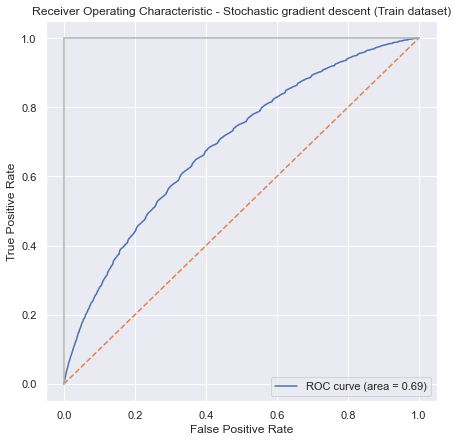

In [138]:
y_score15 = model.predict_proba(X_train)[:,1]
false_positive_rate15, true_positive_rate15, threshold15 = roc_curve(y_train, y_score15)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Stochastic gradient descent (Train dataset)')
plt.plot(false_positive_rate15, true_positive_rate15, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score15))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [139]:
print_score(sgd_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 62.69%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.654032      0.608473  0.626865      0.631253      0.631139
recall         0.530708      0.722064  0.626865      0.626386      0.626865
f1-score       0.585952      0.660420  0.626865      0.623186      0.623372
support    10437.000000  10542.000000  0.626865  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[5539 4898]
 [2930 7612]]



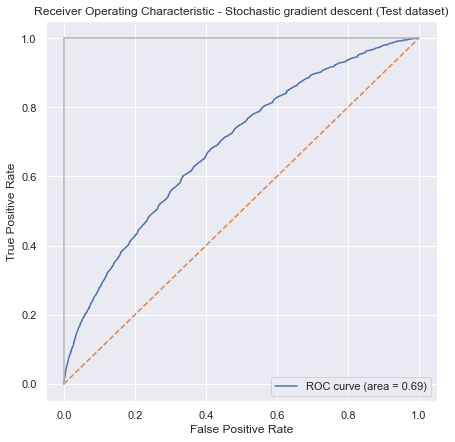

In [140]:
y_score16 = model.predict_proba(X_test)[:,1]
false_positive_rate16, true_positive_rate16, threshold16 = roc_curve(y_test, y_score16)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Stochastic gradient descent (Test dataset)')
plt.plot(false_positive_rate16, true_positive_rate16, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score16))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [141]:
train_score = accuracy_score(y_train, sgd_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, sgd_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Stochastic gradient descent", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996
4,Support vector macghine,62.842200,62.548263
5,Decision Tree Classifier,74.023453,67.457934
6,Stochastic gradient descent,62.923919,62.686496


In [142]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 71.92%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.699708      0.743188  0.719171      0.721448      0.721385
recall         0.770748      0.667295  0.719171      0.719021      0.719171
f1-score       0.733512      0.703200  0.719171      0.718356      0.718400
support    24545.000000  24403.000000  0.719171  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[18918  5627]
 [ 8119 16284]]



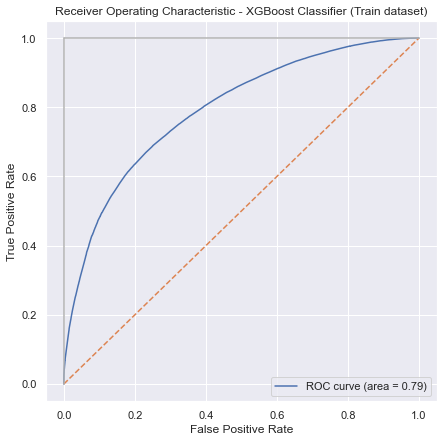

In [143]:
y_score17 = xgb_clf.predict_proba(X_train)[:,1]
false_positive_rate17, true_positive_rate17, threshold17 = roc_curve(y_train, y_score17)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - XGBoost Classifier (Train dataset)')
plt.plot(false_positive_rate17, true_positive_rate17, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score17))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [144]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 69.51%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.675897      0.718273  0.695076      0.697085      0.697191
recall         0.743700      0.646936  0.695076      0.695318      0.695076
f1-score       0.708179      0.680741  0.695076      0.694460      0.694391
support    10437.000000  10542.000000  0.695076  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7762 2675]
 [3722 6820]]



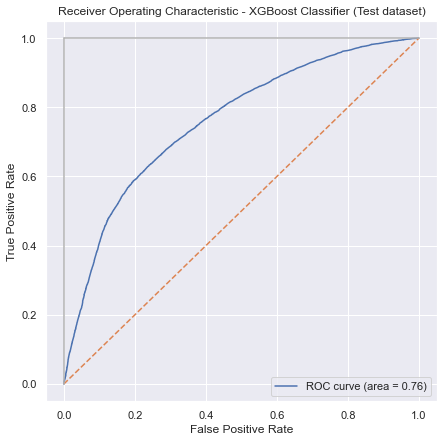

In [145]:
y_score18 = xgb_clf.predict_proba(X_test)[:,1]
false_positive_rate18, true_positive_rate18, threshold18 = roc_curve(y_test, y_score18)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - XGBoost Classifier (Test dataset)')
plt.plot(false_positive_rate18, true_positive_rate18, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score18))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [146]:
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,63.536815,62.839030
1,Random Forest Classifier,74.023453,68.220602
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996
4,Support vector macghine,62.842200,62.548263
5,Decision Tree Classifier,74.023453,67.457934
6,Stochastic gradient descent,62.923919,62.686496
7,XGBoost Classifier,71.917137,69.507603


In [147]:
# Predicted values
y_head_lr = lr_clf.predict(X_train)
#y_head_svm = svm_clf.predict(X_train)
y_head_rf = rf_clf.predict(X_train)
y_head_knn = knn_clf.predict(X_train)
y_head_gaussian = gaussian_clf.predict(X_train)
y_head_svm = svm_clf.predict(X_train)
y_head_dtc = tree_clf.predict(X_train)
y_head_sgd = sgd_clf.predict(X_train)
y_head_xgb = xgb_clf.predict(X_train)

In [148]:
# Predicted values
y_tail_lr = lr_clf.predict(X_test)
#y_tail_svm = svm_clf.predict(X_test)
y_tail_rf = rf_clf.predict(X_test)
y_tail_knn = knn_clf.predict(X_test)
y_tail_gaussian = gaussian_clf.predict(X_test)
y_tail_svm = svm_clf.predict(X_test)
y_tail_dtc = tree_clf.predict(X_test)
y_tail_sgd = sgd_clf.predict(X_test)
y_tail_xgb = xgb_clf.predict(X_test)

In [149]:
cm_lr = confusion_matrix(y_train,y_head_lr)
#cm_svm = confusion_matrix(y_train,y_head_svm)
cm_rf = confusion_matrix(y_train,y_head_rf)
cm_knn = confusion_matrix(y_train,y_head_knn)
cm_gaussian = confusion_matrix(y_train,y_head_gaussian)
cm_svm = confusion_matrix(y_train,y_head_svm)
cm_dtc = confusion_matrix(y_train,y_head_dtc)
cm_sgd = confusion_matrix(y_train,y_head_sgd)
cm_xgb = confusion_matrix(y_train,y_head_xgb)

In [150]:
cmt_lr = confusion_matrix(y_test,y_tail_lr)
#cmt_svm = confusion_matrix(y_test,y_tail_svm)
cmt_rf = confusion_matrix(y_test,y_tail_rf)
cmt_knn = confusion_matrix(y_test,y_tail_knn)
cmt_gaussian = confusion_matrix(y_test,y_tail_gaussian)
cmt_svm = confusion_matrix(y_test,y_tail_svm)
cmt_dtc = confusion_matrix(y_test,y_tail_dtc)
cmt_sgd = confusion_matrix(y_test,y_tail_sgd)
cmt_xgb = confusion_matrix(y_test,y_tail_xgb)

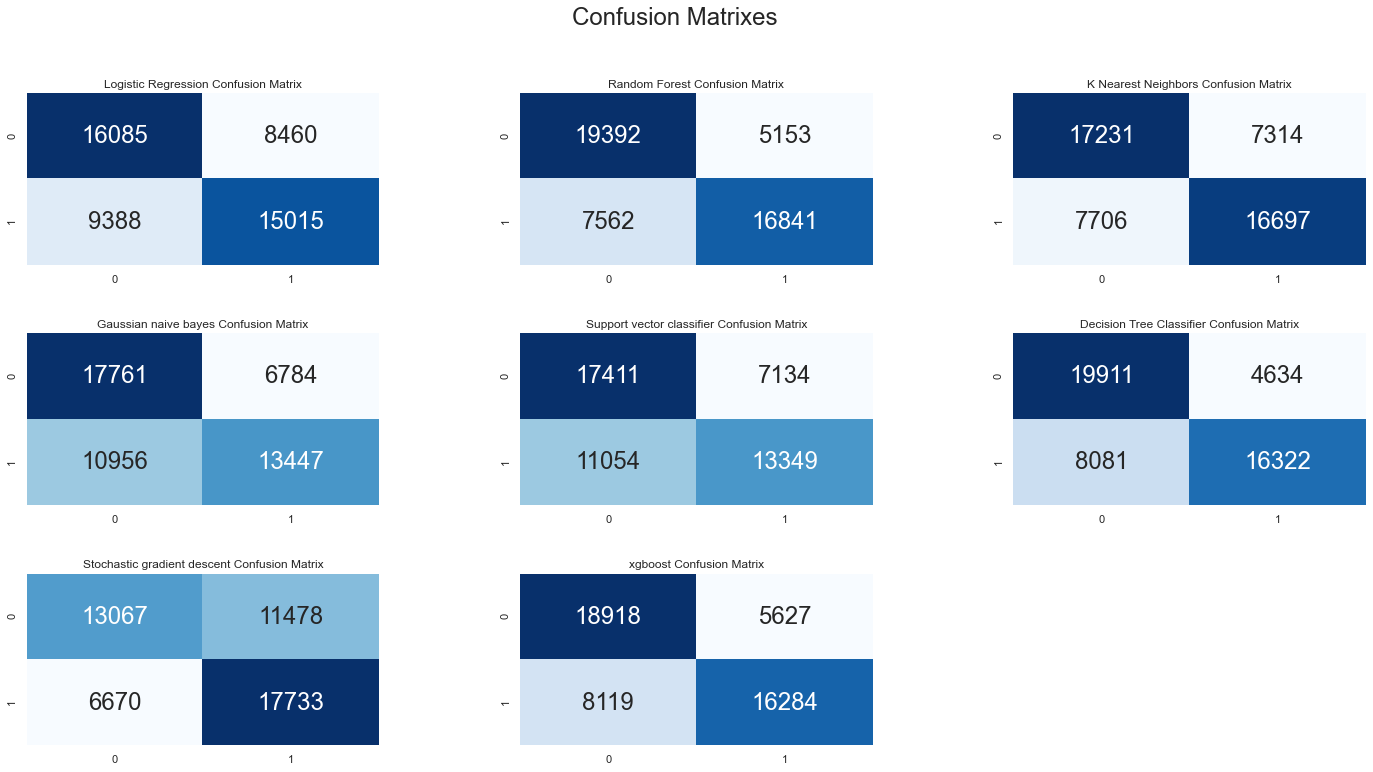

In [151]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.subplot(3,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Gaussian naive bayes Confusion Matrix")
sns.heatmap(cm_gaussian,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Support vector classifier Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.subplot(3,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Stochastic gradient descent Confusion Matrix")
sns.heatmap(cm_sgd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,8)
plt.title("xgboost Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

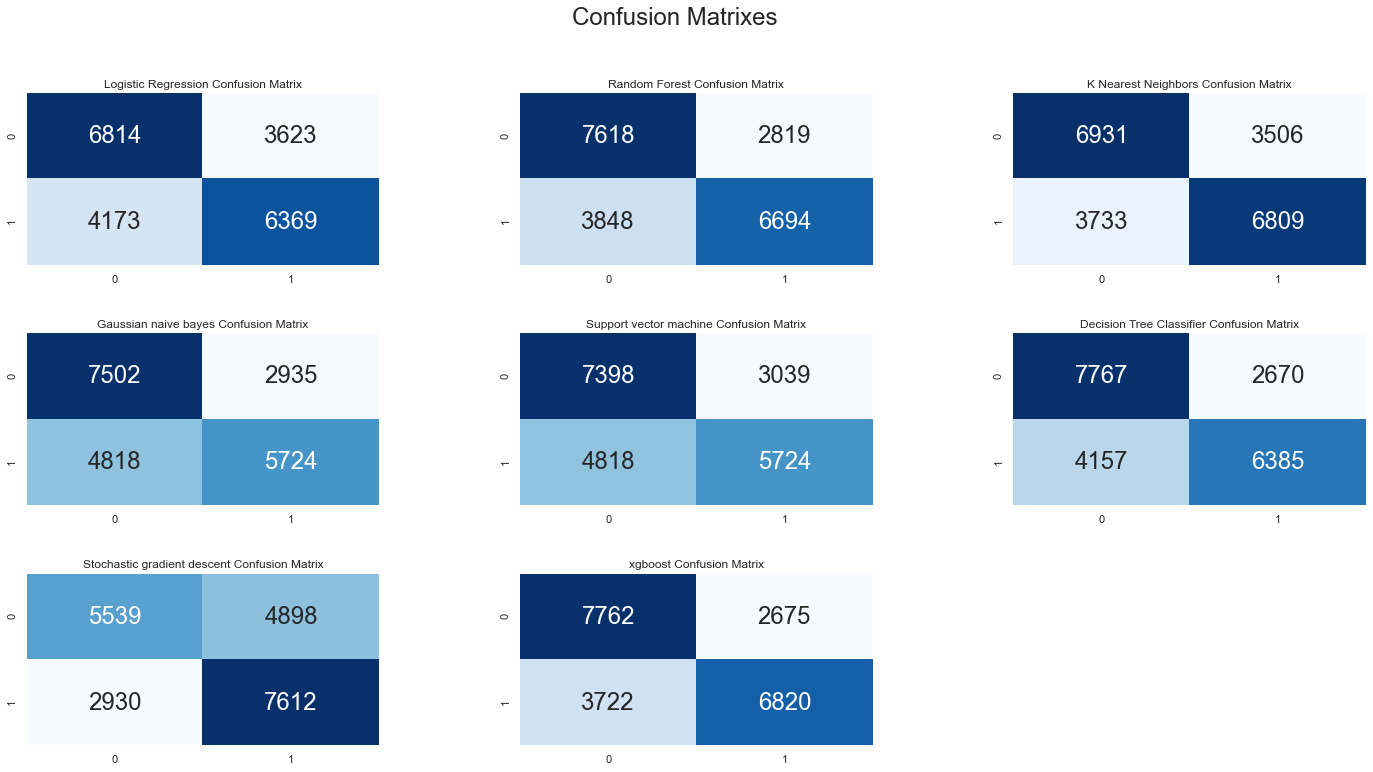

In [152]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cmt_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.subplot(3,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cmt_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmt_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Gaussian naive bayes Confusion Matrix")
sns.heatmap(cmt_gaussian,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Support vector machine Confusion Matrix")
sns.heatmap(cmt_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.subplot(3,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cmt_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Stochastic gradient descent Confusion Matrix")
sns.heatmap(cmt_sgd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,8)
plt.title("xgboost Confusion Matrix")
sns.heatmap(cmt_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Applying Machine Learning Algorithms Using Hyperparameter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished


Best parameters: {'C': 1.623776739188721, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 63.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.631488      0.639620  0.635389      0.635554      0.635542
recall         0.655286      0.615375  0.635389      0.635331      0.635389
f1-score       0.643167      0.627263  0.635389      0.635215      0.635238
support    24545.000000  24403.000000  0.635389  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[16084  8461]
 [ 9386 15017]]



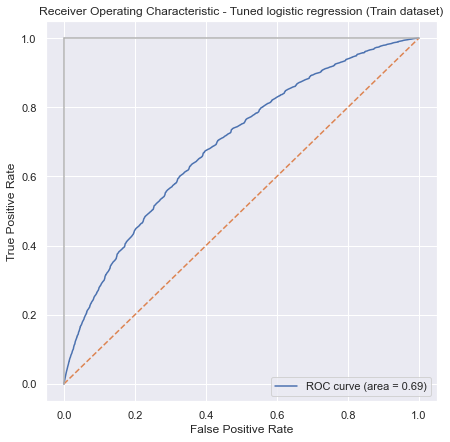

In [155]:
y_score19 = lr_clf.predict_proba(X_train)[:,1]
false_positive_rate19, true_positive_rate19, threshold19 = roc_curve(y_train, y_score19)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned logistic regression (Train dataset)')
plt.plot(false_positive_rate19, true_positive_rate19, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score19))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [156]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 62.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.620231      0.637355   0.62839      0.628793      0.628836
recall         0.652678      0.604345   0.62839      0.628511      0.628390
f1-score       0.636041      0.620411   0.62839      0.628226      0.628187
support    10437.000000  10542.000000   0.62839  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[6812 3625]
 [4171 6371]]



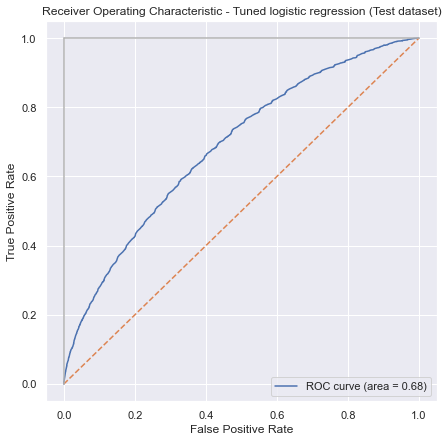

In [157]:
y_score20 = lr_clf.predict_proba(X_test)[:,1]
false_positive_rate20, true_positive_rate20, threshold20 = roc_curve(y_test, y_score20)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned logistic regression (Test dataset)')
plt.plot(false_positive_rate20, true_positive_rate20, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score20))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [158]:
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,63.538858,62.83903


In [159]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
trf_clf = GridSearchCV(rf, parameters)
trf_clf = trf_clf.fit(X_train, y_train)

print_score(trf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 71.02%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.685636      0.742777  0.710203      0.714207      0.714124
recall         0.779466      0.640536  0.710203      0.710001      0.710203
f1-score       0.729547      0.687878  0.710203      0.708712      0.708773
support    24545.000000  24403.000000  0.710203  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19132  5413]
 [ 8772 15631]]



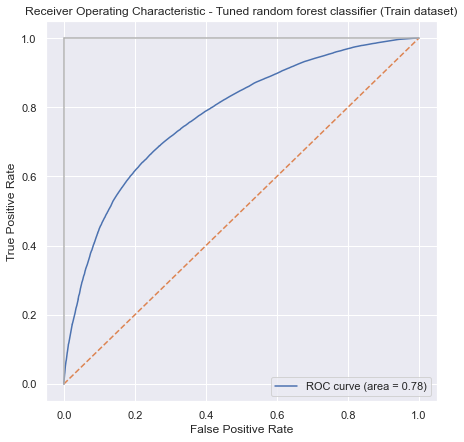

In [160]:
y_score21 = trf_clf.predict_proba(X_train)[:,1]
false_positive_rate21, true_positive_rate21, threshold21 = roc_curve(y_train, y_score21)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned random forest classifier (Train dataset)')
plt.plot(false_positive_rate21, true_positive_rate21, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score21))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [161]:
print_score(trf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 69.83%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.672547      0.732121  0.698317      0.702334      0.702483
recall         0.767079      0.630241  0.698317      0.698660      0.698317
f1-score       0.716709      0.677372  0.698317      0.697040      0.696942
support    10437.000000  10542.000000  0.698317  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[8006 2431]
 [3898 6644]]



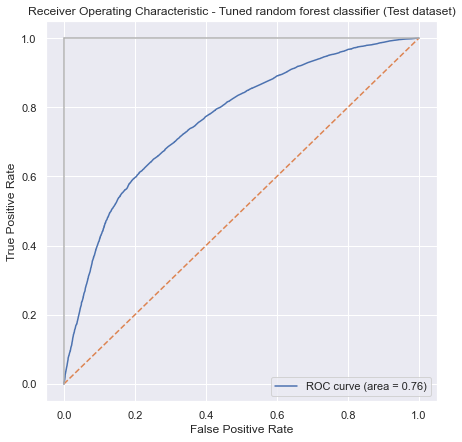

In [162]:
y_score22 = trf_clf.predict_proba(X_test)[:,1]
false_positive_rate22, true_positive_rate22, threshold22 = roc_curve(y_test, y_score22)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned random forest classifier (Test dataset)')
plt.plot(false_positive_rate22, true_positive_rate22, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score22))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [163]:
train_score = accuracy_score(y_train, trf_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, trf_clf.predict(X_test)) * 100




results_df_2 = pd.DataFrame(data=[["Tuned random forest classifier", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,63.538858,62.839030
1,Tuned random forest classifier,71.020266,69.831736


In [164]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 70.56%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.692600      0.720723  0.705606      0.706661      0.706621
recall         0.742432      0.668565  0.705606      0.705499      0.705606
f1-score       0.716651      0.693665  0.705606      0.705158      0.705191
support    24545.000000  24403.000000  0.705606  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[18223  6322]
 [ 8088 16315]]



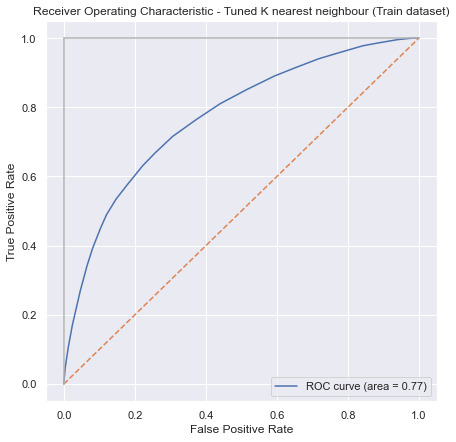

In [165]:
y_score23 = knn_clf.predict_proba(X_train)[:,1]
false_positive_rate23, true_positive_rate23, threshold23 = roc_curve(y_train, y_score23)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned K nearest neighbour (Train dataset)')
plt.plot(false_positive_rate23, true_positive_rate23, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score23))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [166]:
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 68.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.669765      0.703428  0.685304      0.686597      0.686681
recall         0.724825      0.646177  0.685304      0.685501      0.685304
f1-score       0.696208      0.673588  0.685304      0.684898      0.684842
support    10437.000000  10542.000000  0.685304  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7565 2872]
 [3730 6812]]



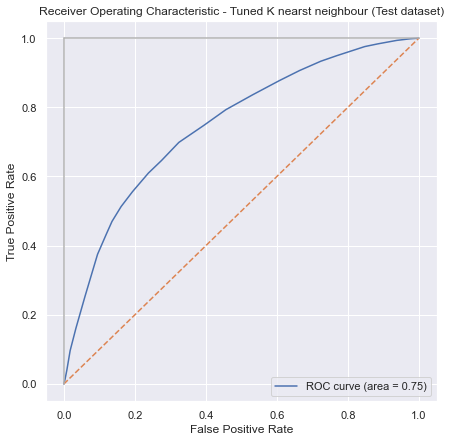

In [167]:
y_score24 = knn_clf.predict_proba(X_test)[:,1]
false_positive_rate24, true_positive_rate24, threshold24 = roc_curve(y_test, y_score24)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned K nearst neighbour (Test dataset)')
plt.plot(false_positive_rate24, true_positive_rate24, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score24))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [168]:
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,63.538858,62.839030
1,Tuned random forest classifier,71.020266,69.831736
2,Tuned K-nearest neighbors,70.560595,68.530435


In [169]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
dt_clf = DecisionTreeClassifier()
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }


# Run the grid search
dtc_clf = GridSearchCV(dt_clf, parameters)
dtc_clf = dtc_clf.fit(X_train, y_train)


print_score(dtc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 70.95%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.689491      0.734744  0.709549      0.712117      0.712052
recall         0.765533      0.653239  0.709549      0.709386      0.709549
f1-score       0.725525      0.691599  0.709549      0.708562      0.708611
support    24545.000000  24403.000000  0.709549  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[18790  5755]
 [ 8462 15941]]



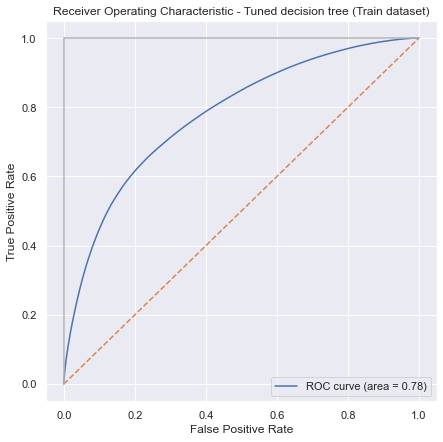

In [170]:
y_score25 = dtc_clf.predict_proba(X_train)[:,1]
false_positive_rate25, true_positive_rate25, threshold25 = roc_curve(y_train, y_score25)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned decision tree (Train dataset)')
plt.plot(false_positive_rate25, true_positive_rate25, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score25))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [171]:
print_score(dtc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 69.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.672414      0.721275  0.694123      0.696844      0.696966
recall         0.751078      0.637735  0.694123      0.694406      0.694123
f1-score       0.709572      0.676937  0.694123      0.693255      0.693173
support    10437.000000  10542.000000  0.694123  20979.000000  20979.000000
_______________________________________________
Confusion Matrix: 
 [[7839 2598]
 [3819 6723]]



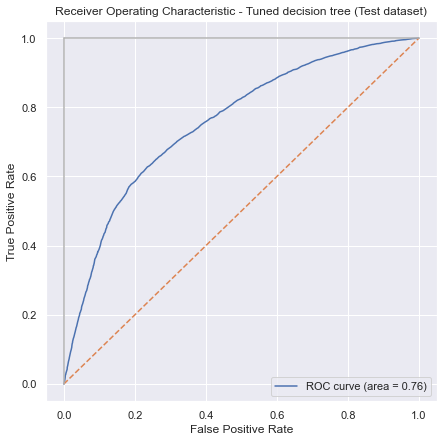

In [172]:
y_score26 = dtc_clf.predict_proba(X_test)[:,1]
false_positive_rate26, true_positive_rate26, threshold26 = roc_curve(y_test, y_score26)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Tuned decision tree (Test dataset)')
plt.plot(false_positive_rate26, true_positive_rate26, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score26))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [173]:
train_score = accuracy_score(y_train, dtc_clf.predict(X_train)) * 100

test_score = accuracy_score(y_test, dtc_clf.predict(X_test)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned decision tree classifier", train_score, test_score]], 
                          columns=['Algorithm', 'Training Accuracy %','Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Algorithm,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,63.538858,62.839030
1,Tuned random forest classifier,71.020266,69.831736
2,Tuned K-nearest neighbors,70.560595,68.530435
3,Tuned decision tree classifier,70.954891,69.412269


In [174]:
y_hp_lr = lr_clf.predict(X_train)
y_hp_rf = trf_clf.predict(X_train)
y_hp_knn = knn_clf.predict(X_train)
y_hp_dtc = dtc_clf.predict(X_train)

In [175]:
#testing
y_hpt_lr = lr_clf.predict(X_test)
y_hpt_rf = trf_clf.predict(X_test)
y_hpt_knn = knn_clf.predict(X_test)
y_hpt_dtc = dtc_clf.predict(X_test)

In [176]:
cms_lr = confusion_matrix(y_train,y_hp_lr)
cms_rf = confusion_matrix(y_train,y_hp_rf)
cms_knn = confusion_matrix(y_train,y_hp_knn)
cms_dtc = confusion_matrix(y_train,y_hp_dtc)

In [177]:
#testing
cmst_lr = confusion_matrix(y_test,y_hpt_lr)
cmst_rf = confusion_matrix(y_test,y_hpt_rf)
cmst_knn = confusion_matrix(y_test,y_hpt_knn)
cmst_dtc = confusion_matrix(y_test,y_hpt_dtc)

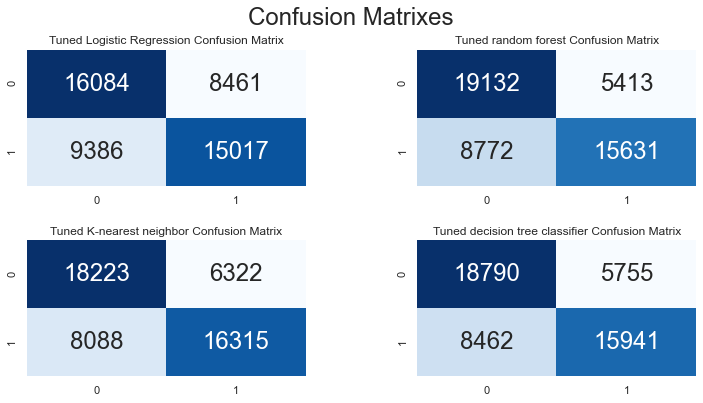

In [178]:
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Tuned Logistic Regression Confusion Matrix")
sns.heatmap(cms_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Tuned random forest Confusion Matrix")
sns.heatmap(cms_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Tuned K-nearest neighbor Confusion Matrix")
sns.heatmap(cms_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("Tuned decision tree classifier Confusion Matrix")
sns.heatmap(cms_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


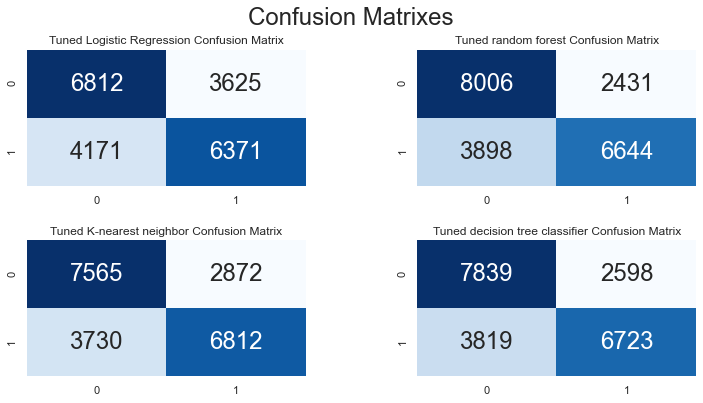

In [179]:
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Tuned Logistic Regression Confusion Matrix")
sns.heatmap(cmst_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Tuned random forest Confusion Matrix")
sns.heatmap(cmst_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,2,3)
plt.title("Tuned K-nearest neighbor Confusion Matrix")
sns.heatmap(cmst_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("Tuned decision tree classifier Confusion Matrix")
sns.heatmap(cmst_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# Model Evaluation

In [180]:
#We can now rank our evaluation of all the models to choose the best one for our problem.

In [181]:
#models = pd.Dataframe({'Model':['Logistic Regression','Support vector machine','Random forest classifier','K-nearest neighbors','Gaussian naive bayes','Perceptron','Decision tree classifier','Stochastic gradient descent','XGboost classifer'],
                      
results_df.sort_values(by=['Training Accuracy %','Testing Accuracy %'], ascending=False)    

,Algorithm,Training Accuracy %,Testing Accuracy %
1,Random Forest Classifier,74.023453,68.220602
5,Decision Tree Classifier,74.023453,67.457934
7,XGBoost Classifier,71.917137,69.507603
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996
0,Logistic Regression,63.536815,62.839030
6,Stochastic gradient descent,62.923919,62.686496
4,Support vector macghine,62.842200,62.548263


In [182]:
results_df.sort_values(by=['Testing Accuracy %','Training Accuracy %'], ascending=False)   

,Algorithm,Training Accuracy %,Testing Accuracy %
7,XGBoost Classifier,71.917137,69.507603
1,Random Forest Classifier,74.023453,68.220602
5,Decision Tree Classifier,74.023453,67.457934
2,K-nearest neighbors,69.314374,65.494065
3,Gaussian naive bayes,63.757457,63.043996
0,Logistic Regression,63.536815,62.839030
6,Stochastic gradient descent,62.923919,62.686496
4,Support vector macghine,62.842200,62.548263


In [183]:
results_df['Accuracy_diff'] = abs(results_df['Training Accuracy %'] - results_df['Testing Accuracy %'])
results_df.sort_values(by=['Accuracy_diff'], ascending=True)

,Algorithm,Training Accuracy %,Testing Accuracy %,Accuracy_diff
6,Stochastic gradient descent,62.923919,62.686496,0.237423
4,Support vector macghine,62.842200,62.548263,0.293937
0,Logistic Regression,63.536815,62.839030,0.697785
3,Gaussian naive bayes,63.757457,63.043996,0.713461
7,XGBoost Classifier,71.917137,69.507603,2.409534
2,K-nearest neighbors,69.314374,65.494065,3.820309
1,Random Forest Classifier,74.023453,68.220602,5.802852
5,Decision Tree Classifier,74.023453,67.457934,6.565519


Tuning result

In [184]:
tuning_results_df.sort_values(by=['Training Accuracy %','Testing Accuracy %'], ascending=False)   

,Algorithm,Training Accuracy %,Testing Accuracy %
1,Tuned random forest classifier,71.020266,69.831736
3,Tuned decision tree classifier,70.954891,69.412269
2,Tuned K-nearest neighbors,70.560595,68.530435
0,Tuned Logistic Regression,63.538858,62.839030


In [185]:
tuning_results_df.sort_values(by=['Testing Accuracy %','Training Accuracy %'], ascending=False) 

,Algorithm,Training Accuracy %,Testing Accuracy %
1,Tuned random forest classifier,71.020266,69.831736
3,Tuned decision tree classifier,70.954891,69.412269
2,Tuned K-nearest neighbors,70.560595,68.530435
0,Tuned Logistic Regression,63.538858,62.839030


In [186]:
tuning_results_df['Accuracy_diff'] = abs(tuning_results_df['Training Accuracy %'] - tuning_results_df['Testing Accuracy %'])
tuning_results_df.sort_values(by=['Accuracy_diff'], ascending=True)

,Algorithm,Training Accuracy %,Testing Accuracy %,Accuracy_diff
0,Tuned Logistic Regression,63.538858,62.839030,0.699828
1,Tuned random forest classifier,71.020266,69.831736,1.188530
3,Tuned decision tree classifier,70.954891,69.412269,1.542621
2,Tuned K-nearest neighbors,70.560595,68.530435,2.030160


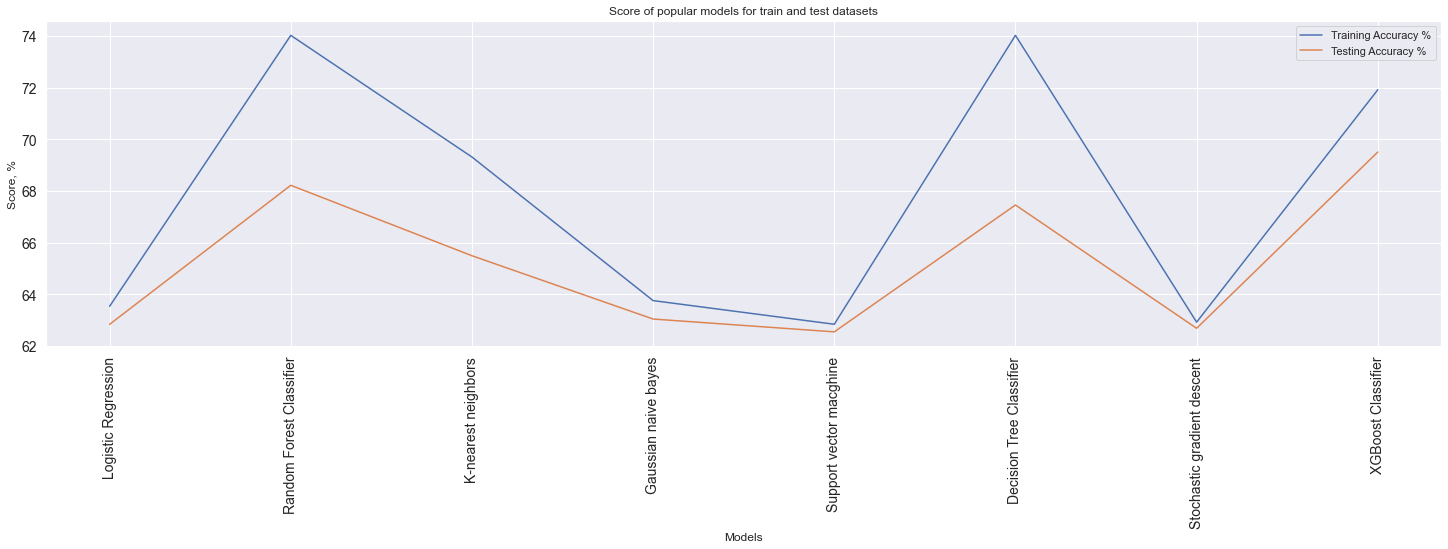

In [187]:
# Plot
plt.figure(figsize=[25,6])
xx = results_df['Algorithm']
plt.tick_params(labelsize=14)
plt.plot(xx, results_df['Training Accuracy %'], label = 'Training Accuracy %')
plt.plot(xx, results_df['Testing Accuracy %'], label = 'Testing Accuracy %')
plt.legend()
plt.title('Score of popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

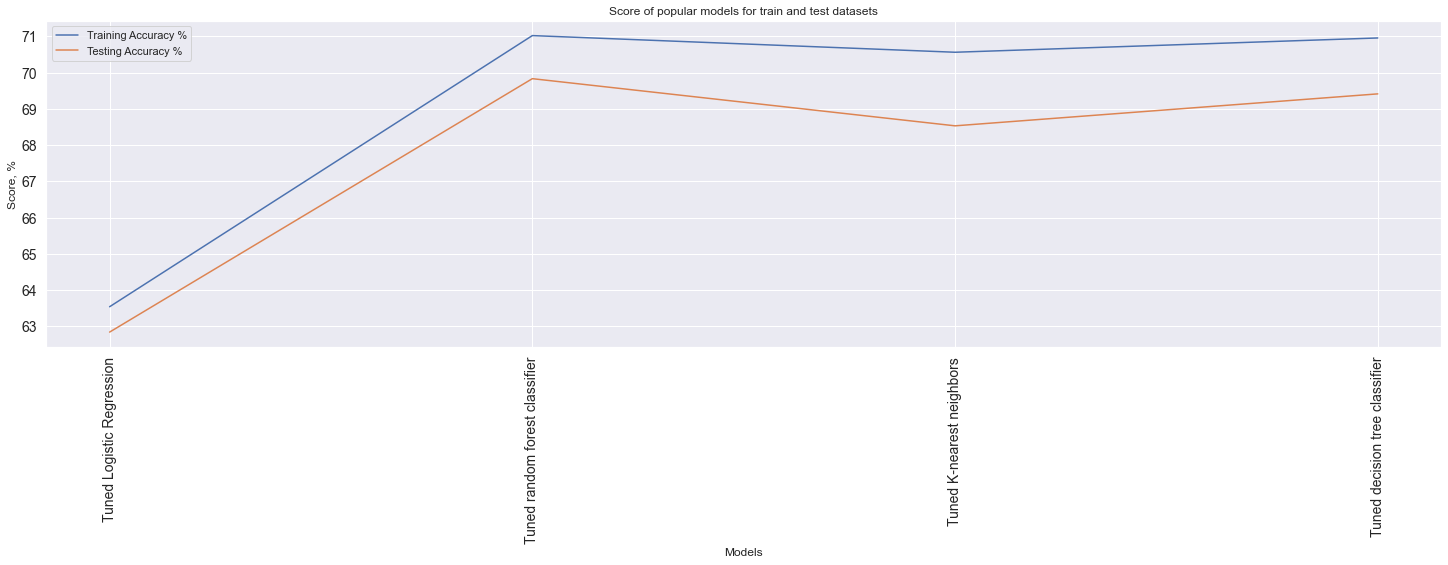

In [188]:
plt.figure(figsize=[25,6])
xx = tuning_results_df['Algorithm']
plt.tick_params(labelsize=14)
plt.plot(xx, tuning_results_df['Training Accuracy %'], label = 'Training Accuracy %')
plt.plot(xx, tuning_results_df['Testing Accuracy %'], label = 'Testing Accuracy %')
plt.legend()
plt.title('Score of popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [189]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)